In [1]:

# all import

import json
from google.colab import drive

import csv
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
%matplotlib inline


from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
drivers_path = glob("/content/drive/MyDrive/Damoov Driving Data/*")


In [3]:
raw_drivers_json = []
procces_drivers_json = []
for d in drivers_path:
  jsons_path = glob(d+"/Raw*.json")
  raw_drivers_json.append(jsons_path)
  jsons_path = glob(d+"/Proc*.json")
  procces_drivers_json.append(jsons_path)

In [ ]:
raw_drivers_json[0]

['/content/drive/MyDrive/Damoov Driving Data/driver3/RawTrackData_c89ce387-23ed-4867-b36c-0b49ec038650.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/RawTrackData_8ea4da4d-5034-4631-9016-56ffa7703dbd.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/RawTrackData_9eaaf1e7-6ec9-4b62-ada2-6fc558336c7f.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/RawTrackData_742e61da-2b8b-4d70-b5e0-d4b628fe1e9d.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/RawTrackData_dcbfdab6-c6ae-43f0-9d9e-b5d2554f5f54.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/RawTrackData_377693f3-83c9-4dc8-bc41-05a3983ad696.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/RawTrackData_19804793-8be4-40a5-9d13-2f7651a0fd0b.json']

In [ ]:
# procces_drivers_json[0] # 0 is driver 3
# procces_drivers_json[1] # 1 is driver 5
# procces_drivers_json[2] # 2 is driver 4
# procces_drivers_json[3] # 3 is driver 2
# procces_drivers_json[4] # 4 is driver 7
# procces_drivers_json[5] # 5 is driver 6
# procces_drivers_json[6] # 6 is driver 1

procces_drivers_json[0]

['/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_30c4b57a-1c3c-4743-bd10-8c6fc45f7a0c.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_1b9c32ac-7f23-4e1c-a806-e9cb4f2e675d.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_977b8fc8-306d-4513-9350-dfef2c8f4538.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_8d086334-b39e-47b2-9815-dccc6992bc9a.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_eccd17d1-29c1-42a2-ba9f-be417f356c8e.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_b277565a-8872-44b8-9d0f-15482e04855c.json',
 '/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_c2e7f6b5-d1c8-4610-8488-e9ec48e777ba.json']

In [ ]:
procces_drivers_json[0][0]

'/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_30c4b57a-1c3c-4743-bd10-8c6fc45f7a0c.json'

In [ ]:
procces_drivers_json[0][2]

'/content/drive/MyDrive/Damoov Driving Data/driver3/ProcessedTrackData_977b8fc8-306d-4513-9350-dfef2c8f4538.json'

In [ ]:
with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
    obj = json.load(json_file)


In [ ]:
obj["trip"].keys()

dict_keys(['id', 'dateUpdated', 'identifiers', 'data', 'statistics', 'scores', 'waypoints', 'events', 'related'])

In [ ]:
count = 0
for i in range(0,7):
  print(i,":",len(procces_drivers_json[i]))

  count = count + len(procces_drivers_json[i])
print(count)

0 : 7
1 : 41
2 : 95
3 : 38
4 : 196
5 : 162
6 : 47
586




---



#**Frame waypoints for all drivers**

In [ ]:
with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
    obj = json.load(json_file)

headers =[k for k in obj["trip"]["waypoints"][0].keys()]
headers.insert(0,"tripidx")
print(headers)

for i in range(0,7):
  waypoints = []
  for j in range(len(procces_drivers_json[i])):
    with open(procces_drivers_json[i][j], 'r',encoding='utf-8-sig') as json_file:
      obj = json.load(json_file)
    for wp in obj["trip"]["waypoints"]:
      temp = [v for v in obj["trip"]["waypoints"][0].values()]
      temp.insert(0,j)
      waypoints.append(temp)
  df = pd.DataFrame(waypoints,columns=headers)
    # plt.scatter(df["lat"].values,df["long"].values)
    # plt.show()
  df.to_csv(str(i)+"_waypoint.csv")

['tripidx', 'index', 'secSinceStart', 'pointDateUnixMilliseconds', 'lat', 'long', 'speed', 'speedLimit', 'speeding', 'phoneUsage']


> # 0_waypoint



In [ ]:
path = "/content/0_waypoint.csv"
Drive_data_0_waypoint = pd.read_csv(path)

In [ ]:
Drive_data_0_waypoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10763 non-null  int64  
 1   tripidx                    10763 non-null  int64  
 2   index                      10763 non-null  int64  
 3   secSinceStart              10763 non-null  int64  
 4   pointDateUnixMilliseconds  10763 non-null  int64  
 5   lat                        10763 non-null  float64
 6   long                       10763 non-null  float64
 7   speed                      10763 non-null  int64  
 8   speedLimit                 10763 non-null  int64  
 9   speeding                   10763 non-null  object 
 10  phoneUsage                 10763 non-null  bool   
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 851.5+ KB


In [73]:
# Drive_data_0_waypoint.head()

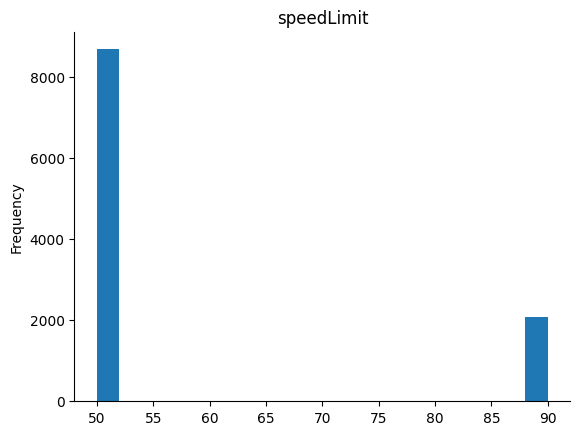

In [ ]:
Drive_data_0_waypoint['speedLimit'].plot(kind='hist', bins=20, title='speedLimit')
plt.gca().spines[['top', 'right',]].set_visible(False)

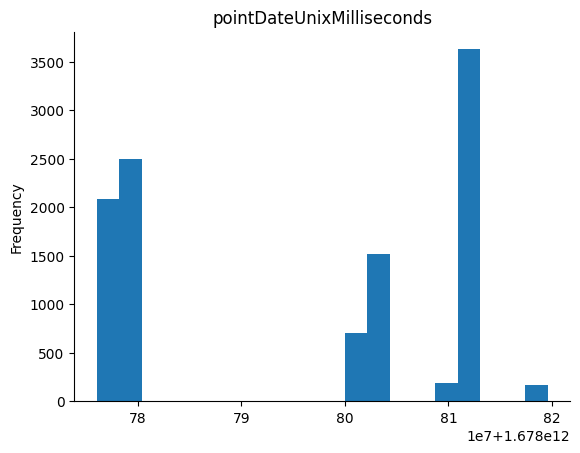

In [ ]:
Drive_data_0_waypoint['pointDateUnixMilliseconds'].plot(kind='hist', bins=20, title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

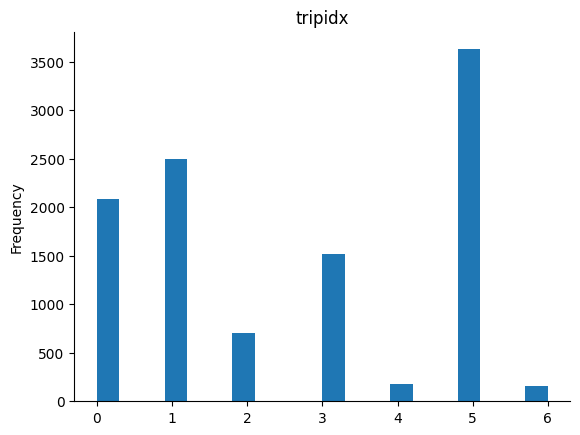

In [ ]:
Drive_data_0_waypoint['tripidx'].plot(kind='hist', bins=20, title='tripidx')
plt.gca().spines[['top', 'right',]].set_visible(False)

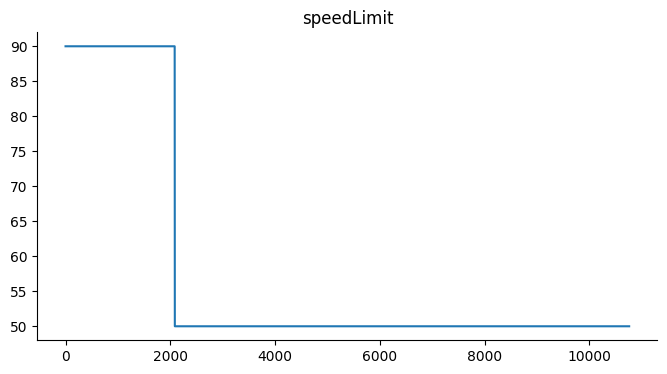

In [ ]:
Drive_data_0_waypoint['speedLimit'].plot(kind='line', figsize=(8, 4), title='speedLimit')
plt.gca().spines[['top', 'right']].set_visible(False)

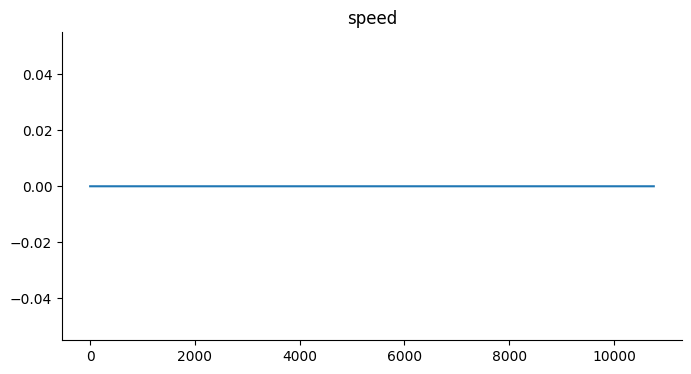

In [ ]:
Drive_data_0_waypoint['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

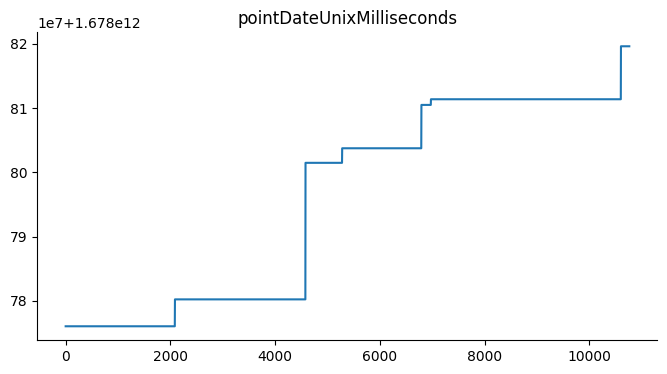

In [ ]:
Drive_data_0_waypoint['pointDateUnixMilliseconds'].plot(kind='line', figsize=(8, 4), title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right']].set_visible(False)

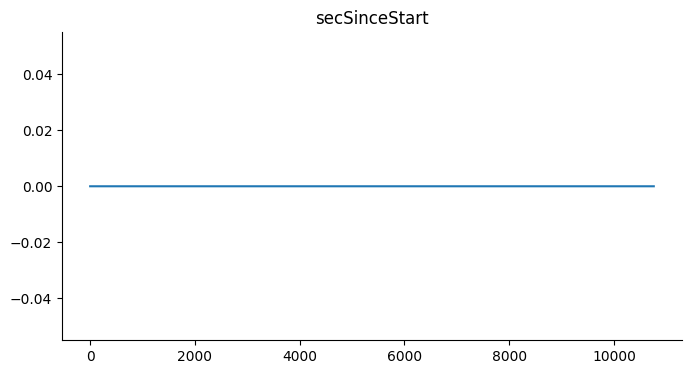

In [ ]:
Drive_data_0_waypoint['secSinceStart'].plot(kind='line', figsize=(8, 4), title='secSinceStart')
plt.gca().spines[['top', 'right']].set_visible(False)

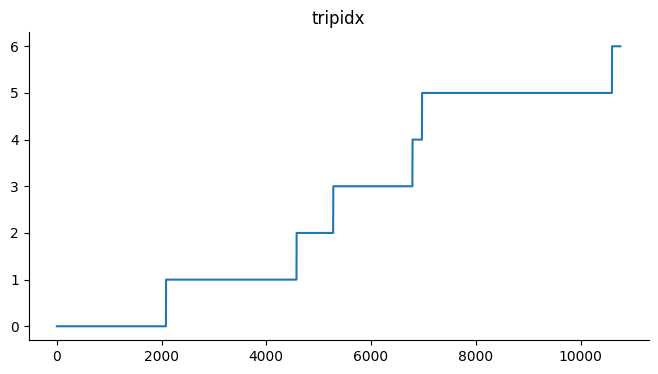

In [ ]:
Drive_data_0_waypoint['tripidx'].plot(kind='line', figsize=(8, 4), title='tripidx')
plt.gca().spines[['top', 'right']].set_visible(False)

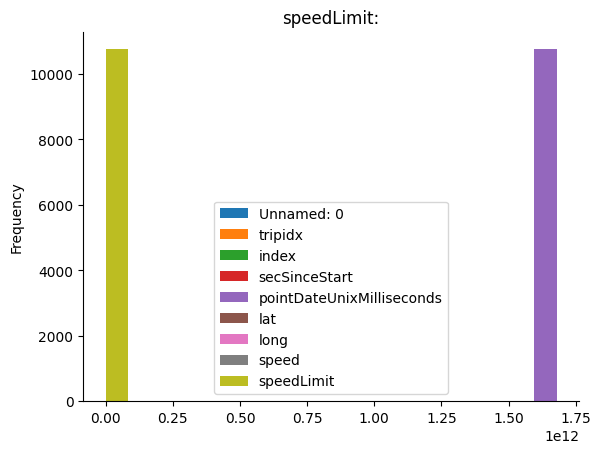

In [ ]:
Drive_data_0_waypoint.plot(kind='hist', bins=20, title='speedLimit:')
plt.gca().spines[['top', 'right',]].set_visible(False)

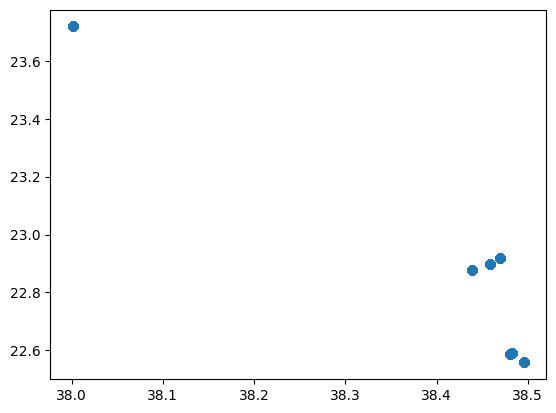

In [ ]:
plt.scatter(Drive_data_0_waypoint.lat.values,Drive_data_0_waypoint.long.values)
plt.show()

> # 1_waypoint:



In [ ]:
path = "/content/1_waypoint.csv"
Drive_data_1_waypoint = pd.read_csv(path)

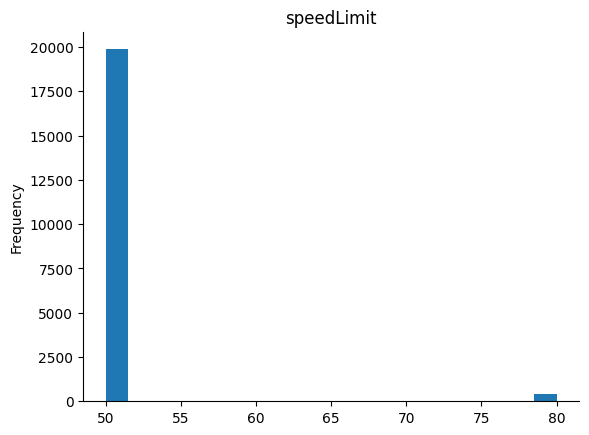

In [ ]:
Drive_data_1_waypoint['speedLimit'].plot(kind='hist', bins=20, title='speedLimit')
plt.gca().spines[['top', 'right',]].set_visible(False)

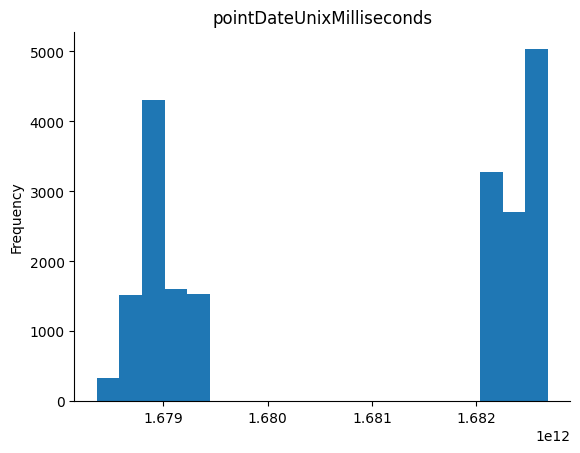

In [ ]:
Drive_data_1_waypoint['pointDateUnixMilliseconds'].plot(kind='hist', bins=20, title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

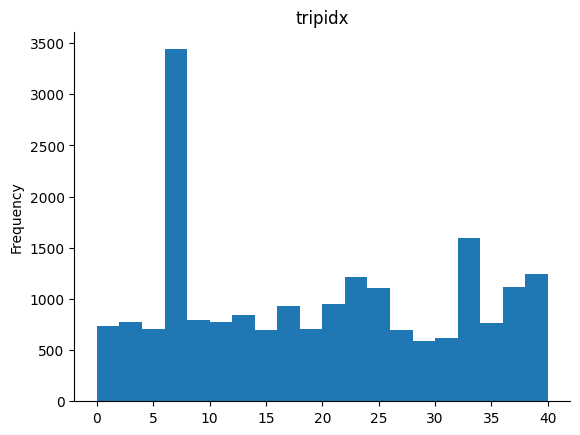

In [ ]:
Drive_data_1_waypoint['tripidx'].plot(kind='hist', bins=20, title='tripidx')
plt.gca().spines[['top', 'right',]].set_visible(False)

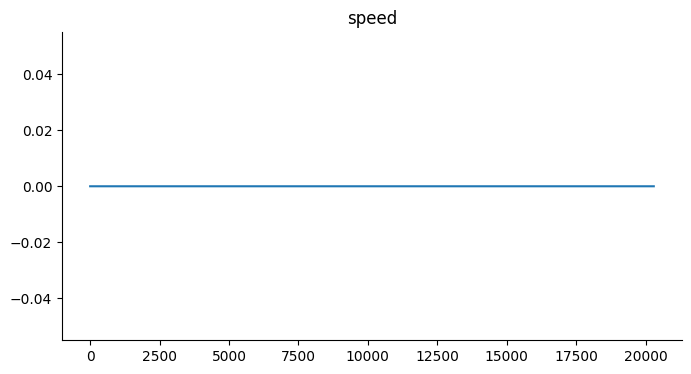

In [ ]:
Drive_data_1_waypoint['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

> # 2_waypoint:

In [ ]:
path = "/content/2_waypoint.csv"
Drive_data_2_waypoint = pd.read_csv(path)

In [ ]:
Drive_data_2_waypoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43279 entries, 0 to 43278
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 43279 non-null  int64  
 1   tripidx                    43279 non-null  int64  
 2   index                      43279 non-null  int64  
 3   secSinceStart              43279 non-null  int64  
 4   pointDateUnixMilliseconds  43279 non-null  int64  
 5   lat                        43279 non-null  float64
 6   long                       43279 non-null  float64
 7   speed                      43279 non-null  int64  
 8   speedLimit                 43279 non-null  int64  
 9   speeding                   43279 non-null  object 
 10  phoneUsage                 43279 non-null  bool   
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 3.3+ MB


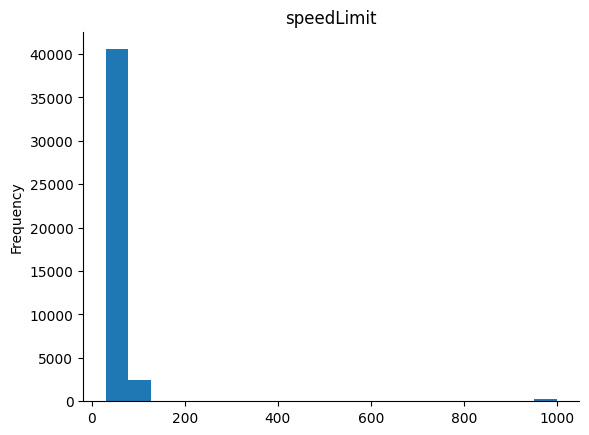

In [ ]:
Drive_data_2_waypoint['speedLimit'].plot(kind='hist', bins=20, title='speedLimit')
plt.gca().spines[['top', 'right',]].set_visible(False)

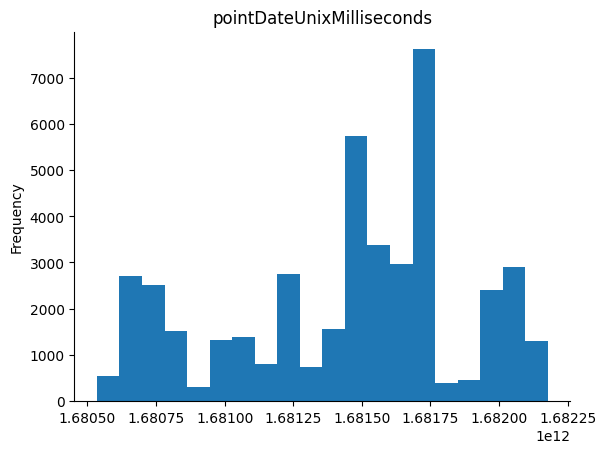

In [ ]:
Drive_data_2_waypoint['pointDateUnixMilliseconds'].plot(kind='hist', bins=20, title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

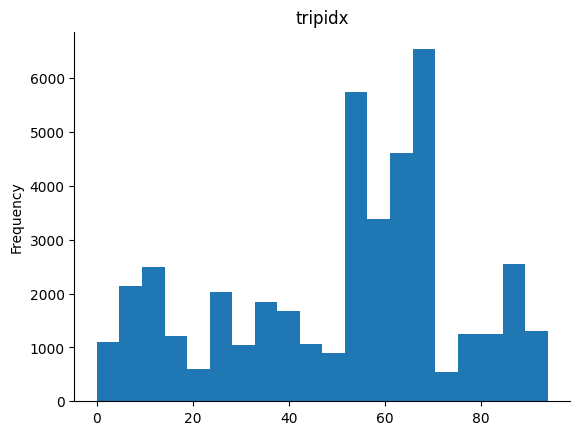

In [ ]:
Drive_data_2_waypoint['tripidx'].plot(kind='hist', bins=20, title='tripidx')
plt.gca().spines[['top', 'right',]].set_visible(False)

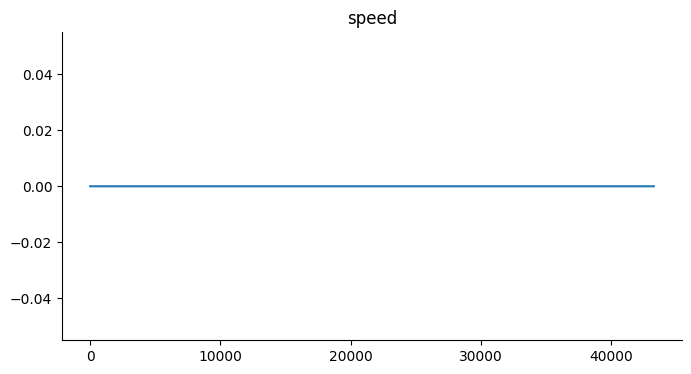

In [ ]:
Drive_data_2_waypoint['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

> # 3_waypoint:



In [ ]:
path = "/content/3_waypoint.csv"
Drive_data_3_waypoint = pd.read_csv(path)

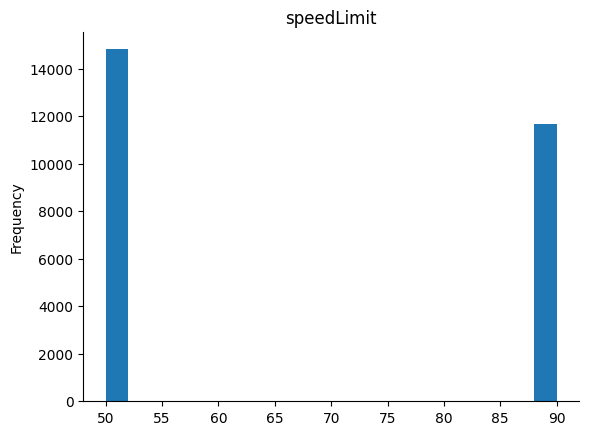

In [ ]:
Drive_data_3_waypoint['speedLimit'].plot(kind='hist', bins=20, title='speedLimit')
plt.gca().spines[['top', 'right',]].set_visible(False)

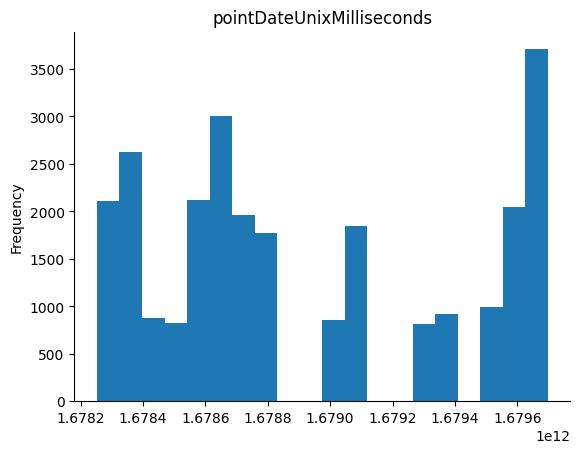

In [ ]:
Drive_data_3_waypoint['pointDateUnixMilliseconds'].plot(kind='hist', bins=20, title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

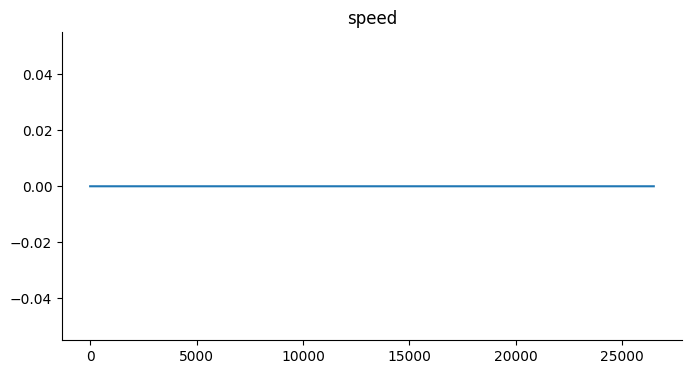

In [ ]:
Drive_data_3_waypoint['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

> # 4_waypoint:



In [ ]:
path = "/content/4_waypoint.csv"
Drive_data_4_waypoint = pd.read_csv(path)

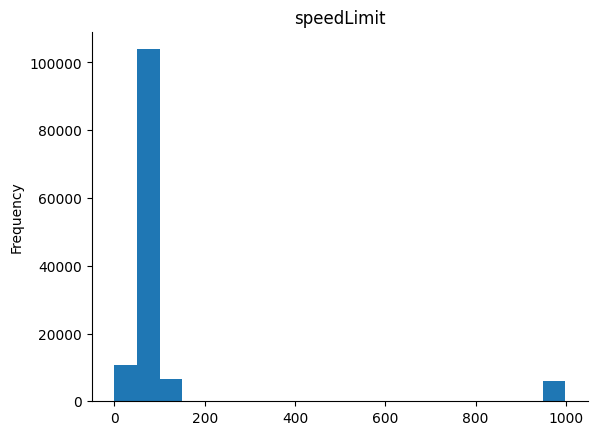

In [ ]:
Drive_data_4_waypoint['speedLimit'].plot(kind='hist', bins=20, title='speedLimit')
plt.gca().spines[['top', 'right',]].set_visible(False)

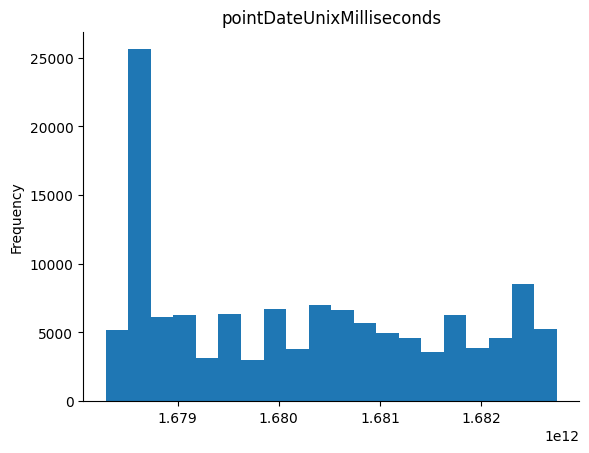

In [ ]:
Drive_data_4_waypoint['pointDateUnixMilliseconds'].plot(kind='hist', bins=20, title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

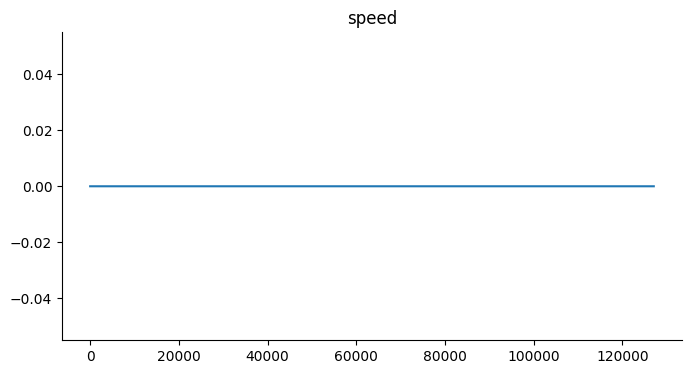

In [ ]:
Drive_data_4_waypoint['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

> # 5_waypoint:



In [ ]:
path = "/content/5_waypoint.csv"
Drive_data_5_waypoint = pd.read_csv(path)

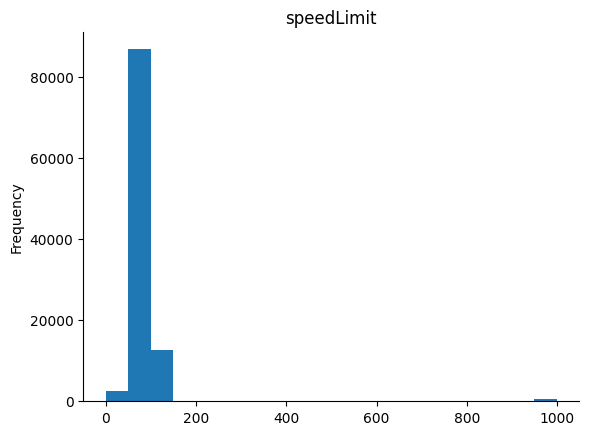

In [ ]:
Drive_data_5_waypoint['speedLimit'].plot(kind='hist', bins=20, title='speedLimit')
plt.gca().spines[['top', 'right',]].set_visible(False)

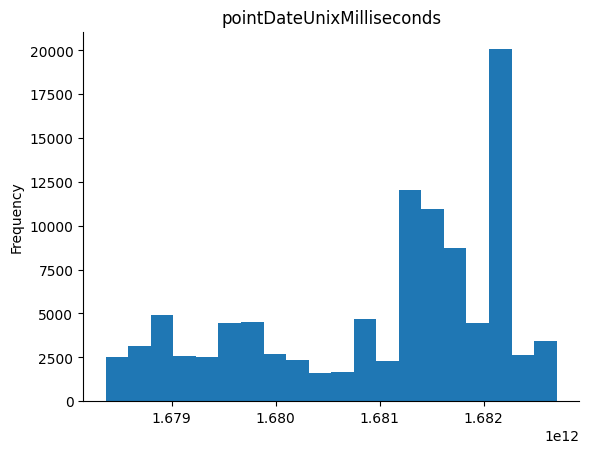

In [ ]:
Drive_data_5_waypoint['pointDateUnixMilliseconds'].plot(kind='hist', bins=20, title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

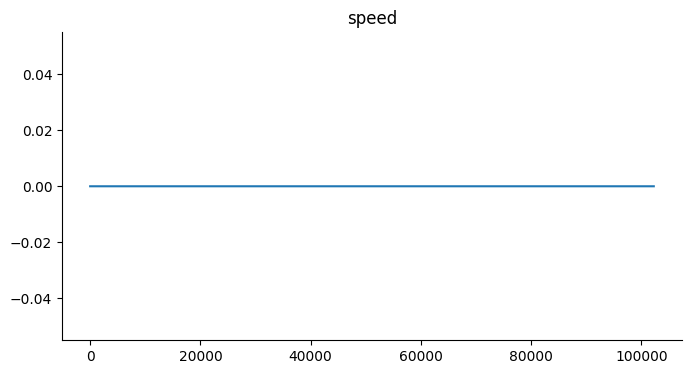

In [ ]:
Drive_data_5_waypoint['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

> # 6_waypoint:



In [ ]:
path = "/content/6_waypoint.csv"
Drive_data_6_waypoint = pd.read_csv(path)

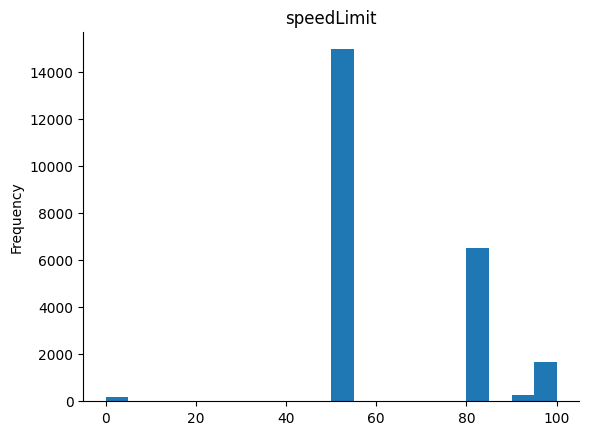

In [ ]:
Drive_data_6_waypoint['speedLimit'].plot(kind='hist', bins=20, title='speedLimit')
plt.gca().spines[['top', 'right',]].set_visible(False)

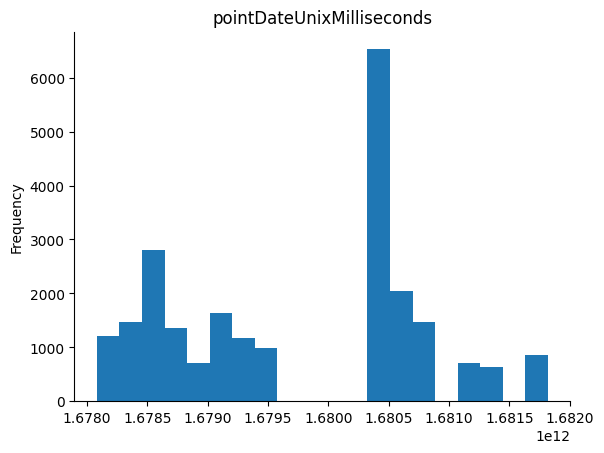

In [ ]:
Drive_data_6_waypoint['pointDateUnixMilliseconds'].plot(kind='hist', bins=20, title='pointDateUnixMilliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

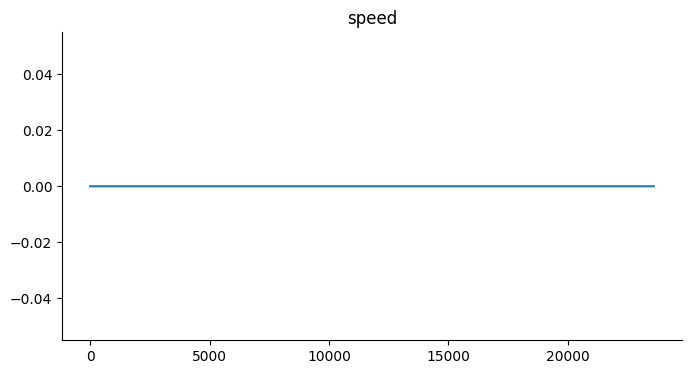

In [ ]:
Drive_data_6_waypoint['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

#**Frame identifiers**

In [ ]:
obj["trip"]["identifiers"].keys()

dict_keys(['companyId', 'applicationId', 'instanceId', 'userId'])

In [ ]:
obj["trip"]["id"]

'c2e7f6b5-d1c8-4610-8488-e9ec48e777ba'

In [ ]:
obj["trip"]["identifiers"].values()

dict_values(['8a71134c-9b55-48fd-a5ee-fec5f0181192', '75f84ece-7c8a-4b69-b5d6-307bb473c6a7', 'b7003815-6d34-4963-8731-e58f1b7a7748', '65c95a89-f62d-44f5-ac80-7bbcda1478a3'])

In [ ]:
with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
    obj = json.load(json_file)

headers = [k for k in obj["trip"]["identifiers"].keys()]
headers.insert(0,"driver")
headers.insert(1,"trip")
print(headers)

ids = []

for i in range(0,7):
  for j in range(len(procces_drivers_json[i])):
    with open(procces_drivers_json[i][j], 'r',encoding='utf-8-sig') as json_file:
      obj = json.load(json_file)

    temp = [v for v in obj["trip"]["identifiers"].values()]
    temp.insert(0,i)
    temp.insert(1,j)
    # print(temp)
    ids.append(temp)

    df = pd.DataFrame(ids,columns=headers)

df.to_csv("identifiers.csv")

['driver', 'trip', 'companyId', 'applicationId', 'instanceId', 'userId']


In [ ]:
path = "/content/identifiers.csv"
Drive_data_identifiers = pd.read_csv(path)

Drive_data_identifiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     586 non-null    int64 
 1   driver         586 non-null    int64 
 2   trip           586 non-null    int64 
 3   companyId      586 non-null    object
 4   applicationId  586 non-null    object
 5   instanceId     586 non-null    object
 6   userId         586 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.2+ KB


In [ ]:
Drive_data_identifiers.head()

,Unnamed: 0,driver,trip,companyId,applicationId,instanceId,userId
0,0,0,0,8a71134c-9b55-48fd-a5ee-fec5f0181192,75f84ece-7c8a-4b69-b5d6-307bb473c6a7,b7003815-6d34-4963-8731-e58f1b7a7748,65c95a89-f62d-44f5-ac80-7bbcda1478a3
1,1,0,1,8a71134c-9b55-48fd-a5ee-fec5f0181192,75f84ece-7c8a-4b69-b5d6-307bb473c6a7,b7003815-6d34-4963-8731-e58f1b7a7748,65c95a89-f62d-44f5-ac80-7bbcda1478a3
2,2,0,2,8a71134c-9b55-48fd-a5ee-fec5f0181192,75f84ece-7c8a-4b69-b5d6-307bb473c6a7,b7003815-6d34-4963-8731-e58f1b7a7748,65c95a89-f62d-44f5-ac80-7bbcda1478a3
3,3,0,3,8a71134c-9b55-48fd-a5ee-fec5f0181192,75f84ece-7c8a-4b69-b5d6-307bb473c6a7,b7003815-6d34-4963-8731-e58f1b7a7748,65c95a89-f62d-44f5-ac80-7bbcda1478a3
4,4,0,4,8a71134c-9b55-48fd-a5ee-fec5f0181192,75f84ece-7c8a-4b69-b5d6-307bb473c6a7,b7003815-6d34-4963-8731-e58f1b7a7748,65c95a89-f62d-44f5-ac80-7bbcda1478a3


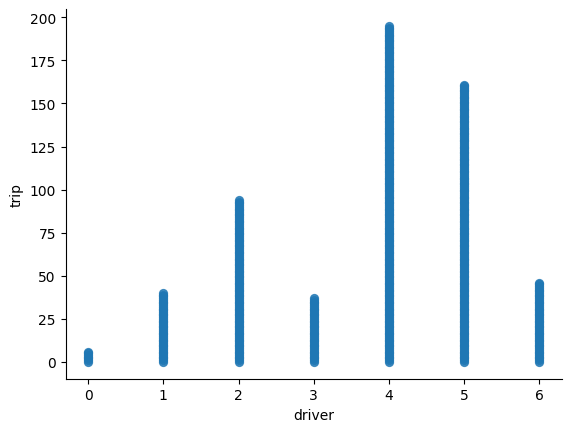

In [ ]:
Drive_data_identifiers.plot(kind='scatter', x='driver', y='trip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



---



#**Frame data**

In [ ]:
obj["trip"]["data"].keys()

dict_keys(['startDate', 'startDateUnixMilliseconds', 'endDate', 'endDateUnixMilliseconds', 'unitSystem', 'addresses', 'transportType', 'tags', 'vehicle'])

In [ ]:
with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
    obj = json.load(json_file)

headers =[k for k in obj["trip"]["data"].keys()]
headers.insert(0,"driver")
headers.insert(1,"trip")

print(headers)

datas = []

for i in range(0,7):

  for j in range(len(procces_drivers_json[i])):
    with open(procces_drivers_json[i][j], 'r',encoding='utf-8-sig') as json_file:
      obj = json.load(json_file)


    temp = [v for v in obj["trip"]["data"].values()]
    temp.insert(0,i)
    temp.insert(1,j)

    datas.append(temp)
    df = pd.DataFrame(datas,columns=headers)
df.to_csv("data.csv")

['driver', 'trip', 'startDate', 'startDateUnixMilliseconds', 'endDate', 'endDateUnixMilliseconds', 'unitSystem', 'addresses', 'transportType', 'tags', 'vehicle']


In [ ]:
path = "/content/data.csv"
Drive_data_data = pd.read_csv(path)

Drive_data_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 586 non-null    int64  
 1   driver                     586 non-null    int64  
 2   trip                       586 non-null    int64  
 3   startDate                  586 non-null    object 
 4   startDateUnixMilliseconds  586 non-null    int64  
 5   endDate                    586 non-null    object 
 6   endDateUnixMilliseconds    586 non-null    int64  
 7   unitSystem                 586 non-null    int64  
 8   addresses                  586 non-null    object 
 9   transportType              586 non-null    object 
 10  tags                       586 non-null    object 
 11  vehicle                    0 non-null      float64
dtypes: float64(1), int64(6), object(5)
memory usage: 55.1+ KB


In [ ]:
Drive_data_data.head()

,Unnamed: 0,driver,trip,startDate,startDateUnixMilliseconds,endDate,endDateUnixMilliseconds,unitSystem,addresses,transportType,tags,vehicle
0,0,0,0,2023-03-14T08:40:52+02:00,1678776052000,2023-03-14T09:32:00+02:00,1678779120000,0,"{'start': {'full': 'Leivadeias-Bralou, 321 00 ...","{'current': 'OriginalDriver', 'confirmNeeded':...",[],NaN
1,1,0,1,2023-03-14T09:50:36+02:00,1678780236000,2023-03-14T10:36:36+02:00,1678782996000,0,"{'start': {'full': 'Guesthouse Ontas, 320 04 A...","{'current': 'OriginalDriver', 'confirmNeeded':...",[],NaN
2,2,0,2,2023-03-14T15:44:33+02:00,1678801473000,2023-03-14T15:57:00+02:00,1678802220000,0,{'start': {'full': 'Eparchiaki Odos Lilaias-Ar...,"{'current': 'OriginalDriver', 'confirmNeeded':...",[],NaN
3,3,0,3,2023-03-14T16:22:17+02:00,1678803737000,2023-03-14T16:55:38+02:00,1678805738000,0,"{'start': {'full': 'Leivadeias-Arachovas, 320 ...","{'current': 'OriginalDriver', 'confirmNeeded':...",[],NaN
4,4,0,4,2023-03-14T18:14:39+02:00,1678810479000,2023-03-14T18:19:57+02:00,1678810797000,0,"{'start': {'full': 'Thessalonikis 9, 321 31 Le...","{'current': 'OriginalDriver', 'confirmNeeded':...",[],NaN


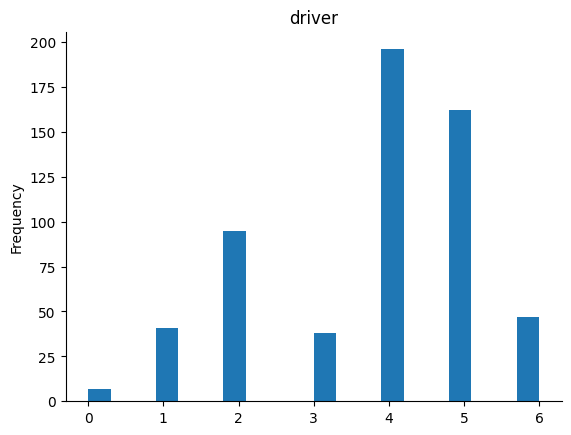

In [ ]:
Drive_data_data['driver'].plot(kind='hist', bins=20, title='driver')
plt.gca().spines[['top', 'right',]].set_visible(False)



---



#**Frame Statistics**

In [ ]:
obj["trip"]["statistics"].keys()

dict_keys(['mileage', 'durationMinutes', 'accelerationsCount', 'brakingsCount', 'corneringsCount', 'totalSpeedingMileage', 'midSpeedingMileage', 'highSpeedingMileage', 'phoneUsageDurationMinutes', 'phoneUsageMileage', 'phoneUsageWithSpeedingDurationMinutes', 'phoneUsageWithSpeedingMileage', 'accidentsCount', 'dayHours', 'rushHours', 'nightHours', 'averageSpeed', 'maxSpeed'])

In [ ]:
with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
    obj = json.load(json_file)

headers =[k for k in obj["trip"]["statistics"].keys()]

headers.insert(0,"driver")
headers.insert(1,"trip")

print(headers)

statistics = []
for i in range(0,7):

  for j in range(len(procces_drivers_json[i])):
    with open(procces_drivers_json[i][j], 'r',encoding='utf-8-sig') as json_file:
      obj = json.load(json_file)

    temp = [v for v in obj["trip"]["statistics"].values()]
    temp.insert(0,i)
    temp.insert(1,j)

    statistics.append(temp)
    df = pd.DataFrame(statistics,columns=headers)
df.to_csv("statistics.csv")

['driver', 'trip', 'mileage', 'durationMinutes', 'accelerationsCount', 'brakingsCount', 'corneringsCount', 'totalSpeedingMileage', 'midSpeedingMileage', 'highSpeedingMileage', 'phoneUsageDurationMinutes', 'phoneUsageMileage', 'phoneUsageWithSpeedingDurationMinutes', 'phoneUsageWithSpeedingMileage', 'accidentsCount', 'dayHours', 'rushHours', 'nightHours', 'averageSpeed', 'maxSpeed']


In [ ]:
path = "/content/statistics.csv"
Drive_data_statistics = pd.read_csv(path)

Drive_data_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             586 non-null    int64  
 1   driver                                 586 non-null    int64  
 2   trip                                   586 non-null    int64  
 3   mileage                                586 non-null    float64
 4   durationMinutes                        586 non-null    float64
 5   accelerationsCount                     586 non-null    int64  
 6   brakingsCount                          586 non-null    int64  
 7   corneringsCount                        586 non-null    int64  
 8   totalSpeedingMileage                   586 non-null    float64
 9   midSpeedingMileage                     586 non-null    float64
 10  highSpeedingMileage                    586 non-null    float64
 11  phoneU

In [ ]:
Drive_data_statistics.head()

,Unnamed: 0,driver,trip,mileage,durationMinutes,accelerationsCount,brakingsCount,corneringsCount,totalSpeedingMileage,midSpeedingMileage,...,phoneUsageDurationMinutes,phoneUsageMileage,phoneUsageWithSpeedingDurationMinutes,phoneUsageWithSpeedingMileage,accidentsCount,dayHours,rushHours,nightHours,averageSpeed,maxSpeed
0,0,0,0,45.658901,51.133333,2,3,2,1.531422,1.164454,...,0.000000,0.000000,0.0,0.0,NaN,0.000,54.671234,0.0,58.371161,89.711128
1,1,0,1,35.705492,46.000000,10,4,4,1.017135,0.429503,...,0.000000,0.000000,0.0,0.0,NaN,0.000,45.983334,0.0,45.050267,65.199814
2,2,0,2,8.895504,12.450000,2,2,0,0.738964,0.248216,...,0.285717,0.238044,0.0,0.0,NaN,12.450,0.000000,0.0,43.655912,67.700432
3,3,0,3,33.073413,33.350000,0,4,0,0.811888,0.314981,...,0.000000,0.000000,0.0,0.0,NaN,33.382,0.000000,0.0,64.256157,87.009300
4,4,0,4,3.424591,5.300000,0,1,0,0.245421,0.093061,...,0.000000,0.000000,0.0,0.0,NaN,0.000,5.300000,0.0,40.674308,64.450546


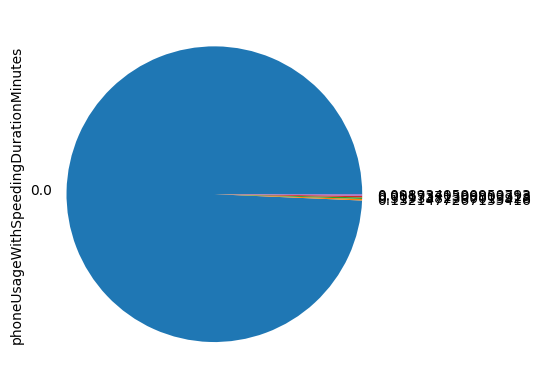

In [ ]:
Drive_data_statistics.phoneUsageWithSpeedingDurationMinutes.value_counts(normalize=True).plot.pie()
plt.show()

Text(0.5, 1.0, 'Plot the accelerationsCount')

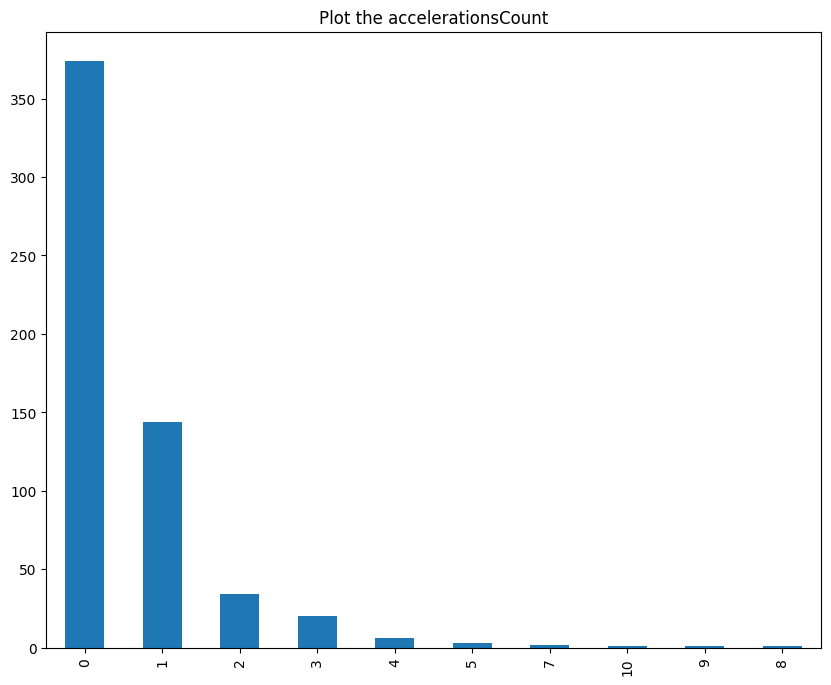

In [ ]:
# df = pd.DataFrame(Drive_data_statistics)
top_10 = Drive_data_statistics['accelerationsCount'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot the accelerationsCount')

Text(0.5, 1.0, 'Plot the brakingsCount')

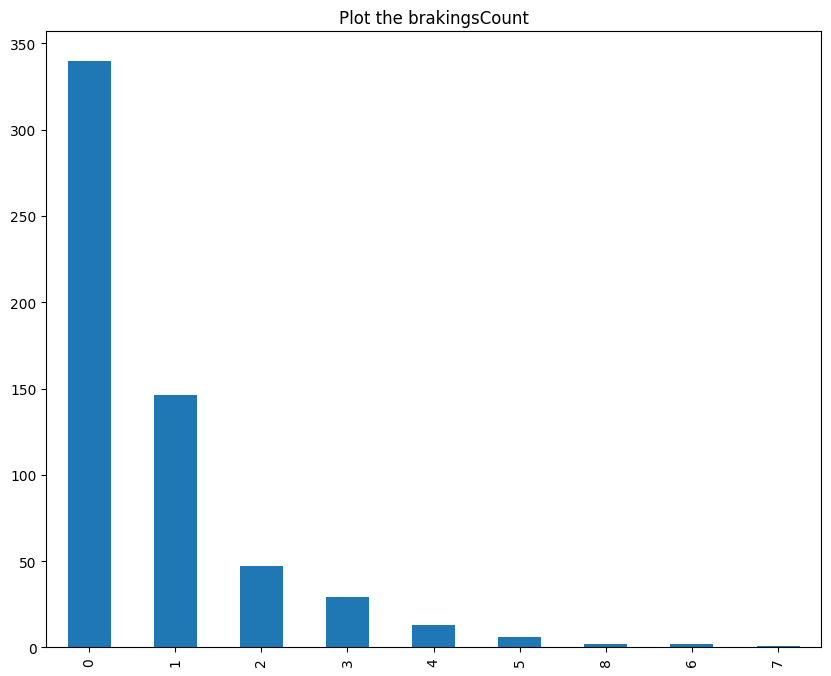

In [ ]:
# df = pd.DataFrame(Drive_data_statistics)
top_10 = Drive_data_statistics['brakingsCount'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot the brakingsCount')

Text(0.5, 1.0, 'Plot the corneringsCount')

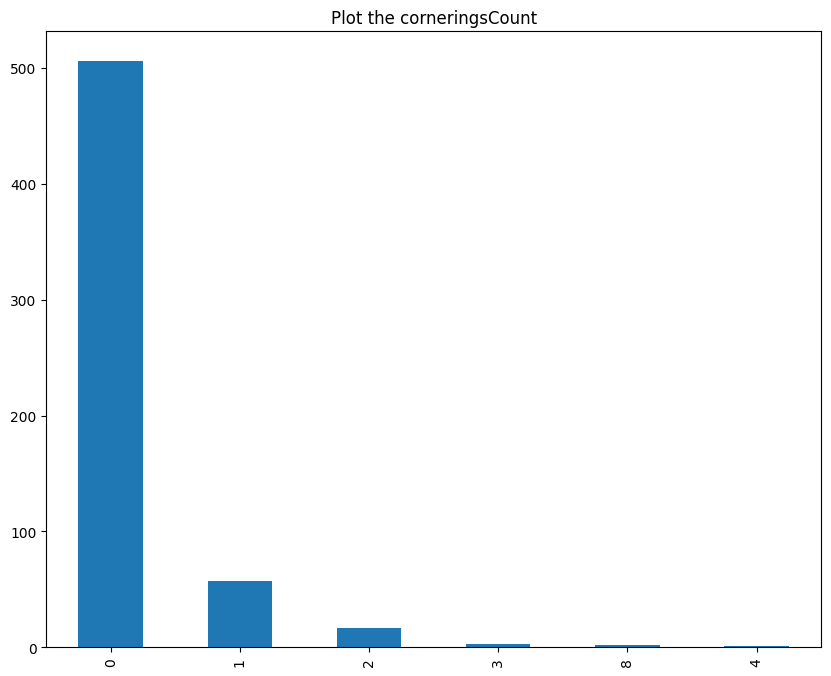

In [ ]:
# df = pd.DataFrame(Drive_data_statistics)
top_10 = Drive_data_statistics['corneringsCount'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot the corneringsCount')



---



#**Frame scores**

In [ ]:
obj["trip"]["scores"].keys()

dict_keys(['safety', 'acceleration', 'braking', 'cornering', 'speeding', 'phoneUsage', 'eco', 'ecoBrakes', 'ecoDepreciation', 'ecoFuel', 'ecoTyres'])

In [ ]:
with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
    obj = json.load(json_file)

headers =[k for k in obj["trip"]["scores"].keys()]
headers.insert(0,"driver")
headers.insert(1,"trip")
print(headers)
scores = []
for i in range(0,7):

  for j in range(len(procces_drivers_json[i])):
    with open(procces_drivers_json[i][j], 'r',encoding='utf-8-sig') as json_file:
      obj = json.load(json_file)


    temp = [v for v in obj["trip"]["scores"].values()]
    temp.insert(0,i)
    temp.insert(1,j)
    scores.append(temp)
    df = pd.DataFrame(scores,columns=headers)
df.to_csv("scores.csv")

['driver', 'trip', 'safety', 'acceleration', 'braking', 'cornering', 'speeding', 'phoneUsage', 'eco', 'ecoBrakes', 'ecoDepreciation', 'ecoFuel', 'ecoTyres']


In [ ]:
path = "/content/scores.csv"
Drive_data_scores = pd.read_csv(path)

Drive_data_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       586 non-null    int64  
 1   driver           586 non-null    int64  
 2   trip             586 non-null    int64  
 3   safety           586 non-null    int64  
 4   acceleration     586 non-null    int64  
 5   braking          586 non-null    int64  
 6   cornering        586 non-null    int64  
 7   speeding         586 non-null    int64  
 8   phoneUsage       586 non-null    int64  
 9   eco              586 non-null    int64  
 10  ecoBrakes        586 non-null    int64  
 11  ecoDepreciation  586 non-null    int64  
 12  ecoFuel          586 non-null    float64
 13  ecoTyres         586 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 64.2 KB


In [ ]:
Drive_data_scores.head()

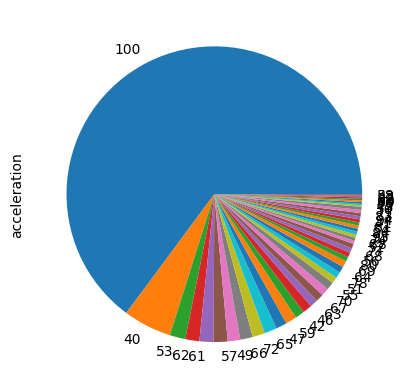

In [ ]:
# Drive_data_statistics.phoneUsageWithSpeedingDurationMinutes.value_counts(normalize=True).plot.pie()
# plt.show()
Drive_data_scores.acceleration.value_counts(normalize=True).plot.pie()
plt.show()

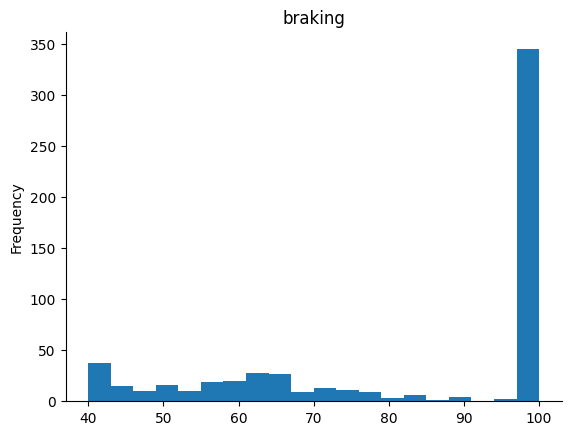

In [ ]:
Drive_data_scores['braking'].plot(kind='hist', bins=20, title='braking')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Plot the braking')

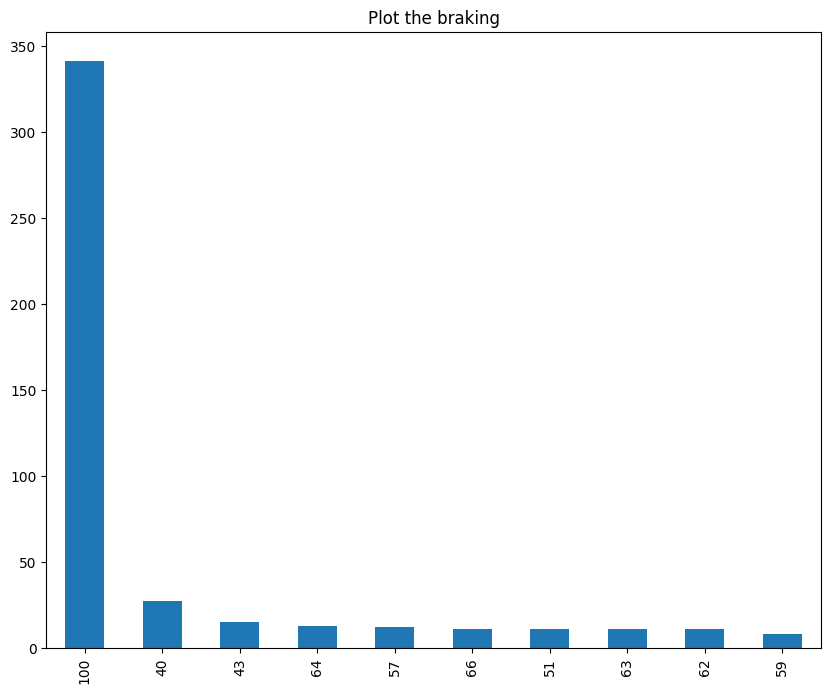

In [ ]:
top_10 = Drive_data_scores['braking'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot the braking')

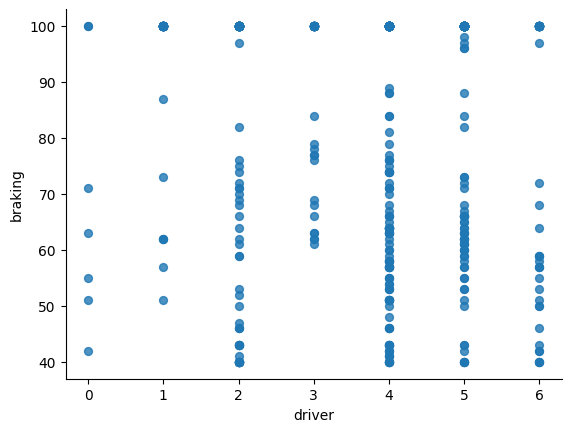

In [ ]:
Drive_data_scores.plot(kind='scatter', x='driver', y='braking', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

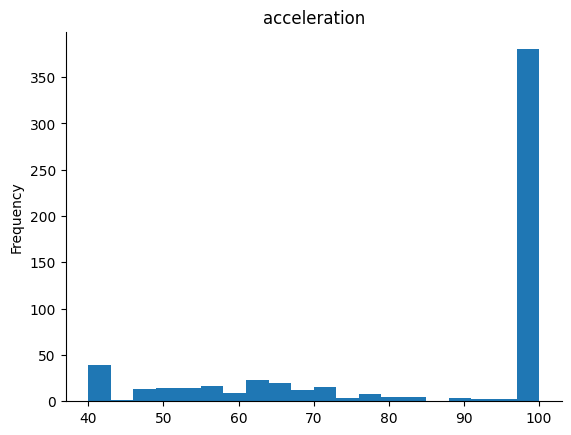

In [ ]:
Drive_data_scores['acceleration'].plot(kind='hist', bins=20, title='acceleration')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Plot the acceleration')

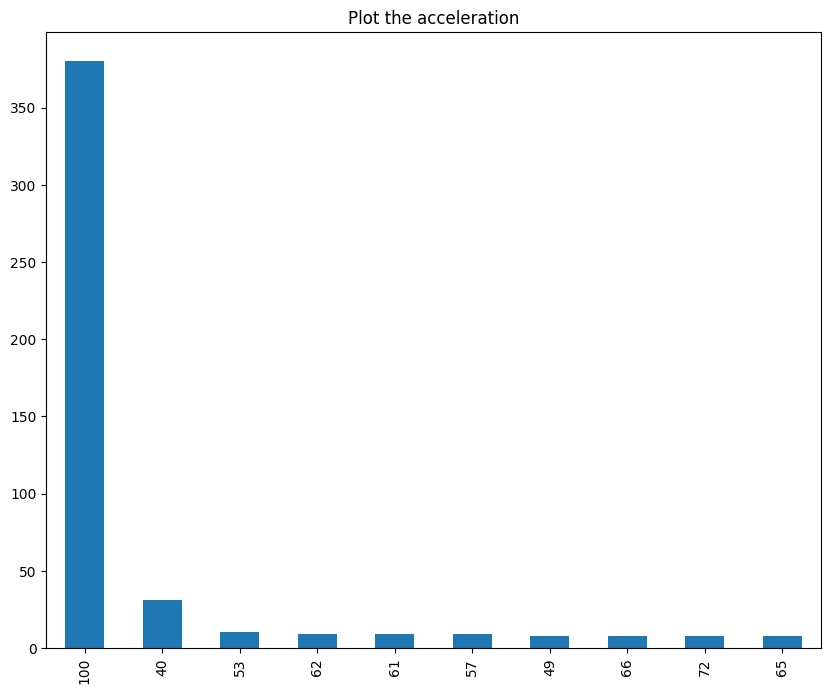

In [ ]:
top_10 = Drive_data_scores['acceleration'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot the acceleration')

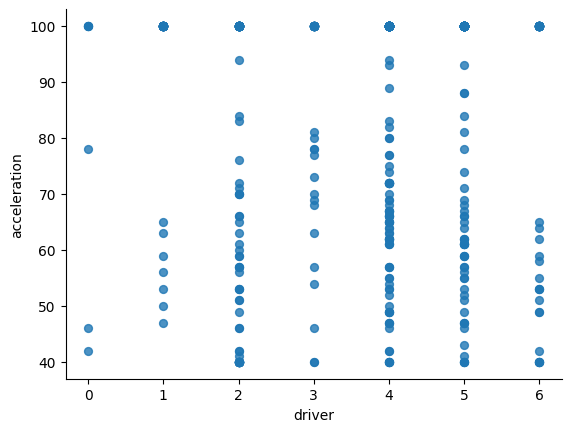

In [ ]:
Drive_data_scores.plot(kind='scatter', x='driver', y='acceleration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

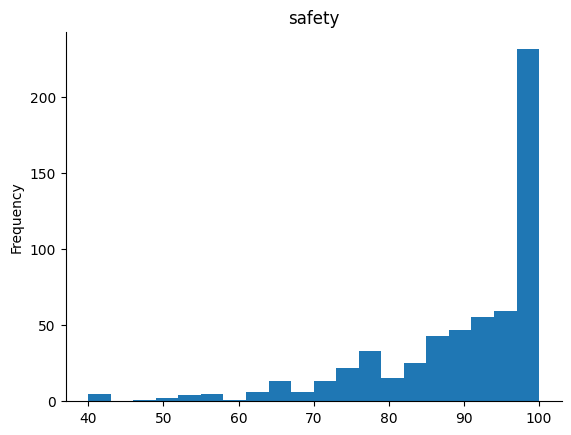

In [ ]:
Drive_data_scores['safety'].plot(kind='hist', bins=20, title='safety')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Plot the safety')

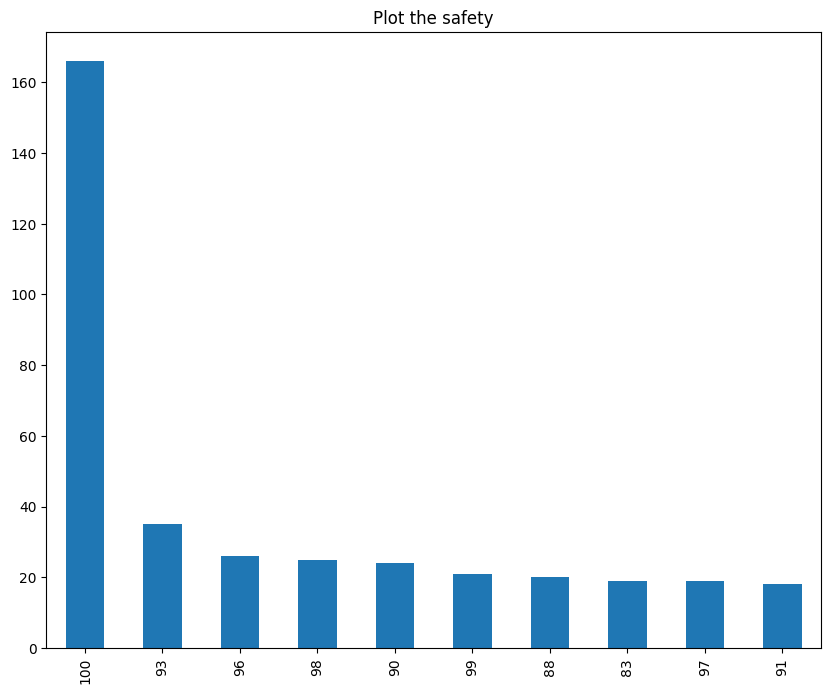

In [ ]:
top_10 = Drive_data_scores['safety'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot the safety')

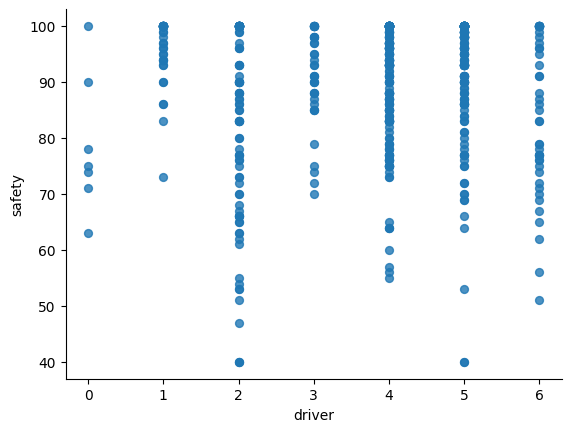

In [ ]:
Drive_data_scores.plot(kind='scatter', x='driver', y='safety', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



---



# events

In [ ]:
obj["trip"]["events"]

In [ ]:
obj["trip"]["events"][0]

In [69]:
# with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
#     obj = json.load(json_file)

# headers =[k for k in obj["trip"]["events"][0].keys()]
# headers.insert(0,"driver")
# headers.insert(1,"trip")
# print(headers)
# events = []
# for i in range(0,7):

#   for j in range(len(procces_drivers_json[i])):
#     with open(procces_drivers_json[i][j], 'r',encoding='utf-8-sig') as json_file:
#       obj = json.load(json_file)


#     temp = [v for v in obj["trip"]["events"][0].values()]
#     temp.insert(0,i)
#     temp.insert(1,j)
#     events.append(temp)
#     df = pd.DataFrame(events,columns=headers)
# df.to_csv("events.csv")



---



# For Classification

In [4]:
with open(procces_drivers_json[0][0], 'r',encoding='utf-8-sig') as json_file:
    obj = json.load(json_file)

headers =[k for k in obj["trip"]["statistics"].keys()]

headers.insert(0,"driver")
headers.insert(1,"trip")

print(headers)

for i in range(0,7):
  statistics = []

  for j in range(len(procces_drivers_json[i])):
    with open(procces_drivers_json[i][j], 'r',encoding='utf-8-sig') as json_file:
      obj = json.load(json_file)

    temp = [v for v in obj["trip"]["statistics"].values()]
    temp.insert(0,i)
    temp.insert(1,j)

    statistics.append(temp)
  df = pd.DataFrame(statistics,columns=headers)
  df.to_csv(str(i)+"_statistics.csv")

['driver', 'trip', 'mileage', 'durationMinutes', 'accelerationsCount', 'brakingsCount', 'corneringsCount', 'totalSpeedingMileage', 'midSpeedingMileage', 'highSpeedingMileage', 'phoneUsageDurationMinutes', 'phoneUsageMileage', 'phoneUsageWithSpeedingDurationMinutes', 'phoneUsageWithSpeedingMileage', 'accidentsCount', 'dayHours', 'rushHours', 'nightHours', 'averageSpeed', 'maxSpeed']


In [5]:
path = "/content/0_statistics.csv"
Drive_data_0_statistics = pd.read_csv(path)

Drive_data_0_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             7 non-null      int64  
 1   driver                                 7 non-null      int64  
 2   trip                                   7 non-null      int64  
 3   mileage                                7 non-null      float64
 4   durationMinutes                        7 non-null      float64
 5   accelerationsCount                     7 non-null      int64  
 6   brakingsCount                          7 non-null      int64  
 7   corneringsCount                        7 non-null      int64  
 8   totalSpeedingMileage                   7 non-null      float64
 9   midSpeedingMileage                     7 non-null      float64
 10  highSpeedingMileage                    7 non-null      float64
 11  phoneUsage

In [6]:
path = "/content/1_statistics.csv"
Drive_data_1_statistics = pd.read_csv(path)

Drive_data_1_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             41 non-null     int64  
 1   driver                                 41 non-null     int64  
 2   trip                                   41 non-null     int64  
 3   mileage                                41 non-null     float64
 4   durationMinutes                        41 non-null     float64
 5   accelerationsCount                     41 non-null     int64  
 6   brakingsCount                          41 non-null     int64  
 7   corneringsCount                        41 non-null     int64  
 8   totalSpeedingMileage                   41 non-null     float64
 9   midSpeedingMileage                     41 non-null     float64
 10  highSpeedingMileage                    41 non-null     float64
 11  phoneUsa

In [7]:
path = "/content/2_statistics.csv"
Drive_data_2_statistics = pd.read_csv(path)

Drive_data_2_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             95 non-null     int64  
 1   driver                                 95 non-null     int64  
 2   trip                                   95 non-null     int64  
 3   mileage                                95 non-null     float64
 4   durationMinutes                        95 non-null     float64
 5   accelerationsCount                     95 non-null     int64  
 6   brakingsCount                          95 non-null     int64  
 7   corneringsCount                        95 non-null     int64  
 8   totalSpeedingMileage                   95 non-null     float64
 9   midSpeedingMileage                     95 non-null     float64
 10  highSpeedingMileage                    95 non-null     float64
 11  phoneUsa

In [8]:
path = "/content/3_statistics.csv"
Drive_data_3_statistics = pd.read_csv(path)

Drive_data_3_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             38 non-null     int64  
 1   driver                                 38 non-null     int64  
 2   trip                                   38 non-null     int64  
 3   mileage                                38 non-null     float64
 4   durationMinutes                        38 non-null     float64
 5   accelerationsCount                     38 non-null     int64  
 6   brakingsCount                          38 non-null     int64  
 7   corneringsCount                        38 non-null     int64  
 8   totalSpeedingMileage                   38 non-null     float64
 9   midSpeedingMileage                     38 non-null     float64
 10  highSpeedingMileage                    38 non-null     float64
 11  phoneUsa

In [9]:
path = "/content/4_statistics.csv"
Drive_data_4_statistics = pd.read_csv(path)

Drive_data_4_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             196 non-null    int64  
 1   driver                                 196 non-null    int64  
 2   trip                                   196 non-null    int64  
 3   mileage                                196 non-null    float64
 4   durationMinutes                        196 non-null    float64
 5   accelerationsCount                     196 non-null    int64  
 6   brakingsCount                          196 non-null    int64  
 7   corneringsCount                        196 non-null    int64  
 8   totalSpeedingMileage                   196 non-null    float64
 9   midSpeedingMileage                     196 non-null    float64
 10  highSpeedingMileage                    196 non-null    float64
 11  phoneU

In [10]:
path = "/content/5_statistics.csv"
Drive_data_5_statistics = pd.read_csv(path)

Drive_data_5_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             162 non-null    int64  
 1   driver                                 162 non-null    int64  
 2   trip                                   162 non-null    int64  
 3   mileage                                162 non-null    float64
 4   durationMinutes                        162 non-null    float64
 5   accelerationsCount                     162 non-null    int64  
 6   brakingsCount                          162 non-null    int64  
 7   corneringsCount                        162 non-null    int64  
 8   totalSpeedingMileage                   162 non-null    float64
 9   midSpeedingMileage                     162 non-null    float64
 10  highSpeedingMileage                    162 non-null    float64
 11  phoneU

In [11]:
path = "/content/6_statistics.csv"
Drive_data_6_statistics = pd.read_csv(path)

Drive_data_6_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             47 non-null     int64  
 1   driver                                 47 non-null     int64  
 2   trip                                   47 non-null     int64  
 3   mileage                                47 non-null     float64
 4   durationMinutes                        47 non-null     float64
 5   accelerationsCount                     47 non-null     int64  
 6   brakingsCount                          47 non-null     int64  
 7   corneringsCount                        47 non-null     int64  
 8   totalSpeedingMileage                   47 non-null     float64
 9   midSpeedingMileage                     47 non-null     float64
 10  highSpeedingMileage                    47 non-null     float64
 11  phoneUsa

# Drop

In [12]:
# I want to create a csv file per drivers
# Files will have the critical data about all the duerations of the drivers

# the critical data is : -> accelerationsCount -> brakingsCount -> corneringsCount -> accidentsCount -> averageSpeed -> maxSpeed -> mileage
#                        -> durationMinutes -> phoneUsageMileage -> dayHours -> rushHours ->nightHours
# these data is from the Statistic frame

# The names which i want drop it is :  Unnamed: 0 | totalSpeedingMileage | midSpeedingMileage | highSpeedingMileage | phoneUsageDurationMinutes
#                                      | phoneUsageWithSpeedingMileage

# 0 driver
Drive_data_0_statistics.drop("Unnamed: 0",axis=1, inplace=True)
Drive_data_0_statistics.drop("totalSpeedingMileage",axis=1, inplace=True)
Drive_data_0_statistics.drop("midSpeedingMileage",axis=1, inplace=True)
Drive_data_0_statistics.drop("highSpeedingMileage",axis=1, inplace=True)
Drive_data_0_statistics.drop("phoneUsageDurationMinutes",axis=1, inplace=True)
Drive_data_0_statistics.drop("phoneUsageWithSpeedingMileage",axis=1, inplace=True)

Drive_data_0_statistics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 7 non-null      int64  
 1   trip                                   7 non-null      int64  
 2   mileage                                7 non-null      float64
 3   durationMinutes                        7 non-null      float64
 4   accelerationsCount                     7 non-null      int64  
 5   brakingsCount                          7 non-null      int64  
 6   corneringsCount                        7 non-null      int64  
 7   phoneUsageMileage                      7 non-null      float64
 8   phoneUsageWithSpeedingDurationMinutes  7 non-null      int64  
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               7 non-null      float64
 11  rushHours 

In [13]:
# 1 driver
Drive_data_1_statistics.drop("Unnamed: 0",axis=1, inplace=True)
Drive_data_1_statistics.drop("totalSpeedingMileage",axis=1, inplace=True)
Drive_data_1_statistics.drop("midSpeedingMileage",axis=1, inplace=True)
Drive_data_1_statistics.drop("highSpeedingMileage",axis=1, inplace=True)
Drive_data_1_statistics.drop("phoneUsageDurationMinutes",axis=1, inplace=True)
Drive_data_1_statistics.drop("phoneUsageWithSpeedingMileage",axis=1, inplace=True)
Drive_data_1_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 41 non-null     int64  
 1   trip                                   41 non-null     int64  
 2   mileage                                41 non-null     float64
 3   durationMinutes                        41 non-null     float64
 4   accelerationsCount                     41 non-null     int64  
 5   brakingsCount                          41 non-null     int64  
 6   corneringsCount                        41 non-null     int64  
 7   phoneUsageMileage                      41 non-null     float64
 8   phoneUsageWithSpeedingDurationMinutes  41 non-null     int64  
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               41 non-null     float64
 11  rushHour

In [14]:
# 2 driver
Drive_data_2_statistics.drop("Unnamed: 0",axis=1, inplace=True)
Drive_data_2_statistics.drop("totalSpeedingMileage",axis=1, inplace=True)
Drive_data_2_statistics.drop("midSpeedingMileage",axis=1, inplace=True)
Drive_data_2_statistics.drop("highSpeedingMileage",axis=1, inplace=True)
Drive_data_2_statistics.drop("phoneUsageDurationMinutes",axis=1, inplace=True)
Drive_data_2_statistics.drop("phoneUsageWithSpeedingMileage",axis=1, inplace=True)

Drive_data_2_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 95 non-null     int64  
 1   trip                                   95 non-null     int64  
 2   mileage                                95 non-null     float64
 3   durationMinutes                        95 non-null     float64
 4   accelerationsCount                     95 non-null     int64  
 5   brakingsCount                          95 non-null     int64  
 6   corneringsCount                        95 non-null     int64  
 7   phoneUsageMileage                      95 non-null     float64
 8   phoneUsageWithSpeedingDurationMinutes  95 non-null     int64  
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               95 non-null     float64
 11  rushHour

In [15]:
# 3 driver
Drive_data_3_statistics.drop("Unnamed: 0",axis=1, inplace=True)
Drive_data_3_statistics.drop("totalSpeedingMileage",axis=1, inplace=True)
Drive_data_3_statistics.drop("midSpeedingMileage",axis=1, inplace=True)
Drive_data_3_statistics.drop("highSpeedingMileage",axis=1, inplace=True)
Drive_data_3_statistics.drop("phoneUsageDurationMinutes",axis=1, inplace=True)
Drive_data_3_statistics.drop("phoneUsageWithSpeedingMileage",axis=1, inplace=True)

Drive_data_3_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 38 non-null     int64  
 1   trip                                   38 non-null     int64  
 2   mileage                                38 non-null     float64
 3   durationMinutes                        38 non-null     float64
 4   accelerationsCount                     38 non-null     int64  
 5   brakingsCount                          38 non-null     int64  
 6   corneringsCount                        38 non-null     int64  
 7   phoneUsageMileage                      38 non-null     float64
 8   phoneUsageWithSpeedingDurationMinutes  38 non-null     int64  
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               38 non-null     float64
 11  rushHour

In [16]:
# 4 driver
Drive_data_4_statistics.drop("Unnamed: 0",axis=1, inplace=True)
Drive_data_4_statistics.drop("totalSpeedingMileage",axis=1, inplace=True)
Drive_data_4_statistics.drop("midSpeedingMileage",axis=1, inplace=True)
Drive_data_4_statistics.drop("highSpeedingMileage",axis=1, inplace=True)
Drive_data_4_statistics.drop("phoneUsageDurationMinutes",axis=1, inplace=True)
Drive_data_4_statistics.drop("phoneUsageWithSpeedingMileage",axis=1, inplace=True)

Drive_data_4_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 196 non-null    int64  
 1   trip                                   196 non-null    int64  
 2   mileage                                196 non-null    float64
 3   durationMinutes                        196 non-null    float64
 4   accelerationsCount                     196 non-null    int64  
 5   brakingsCount                          196 non-null    int64  
 6   corneringsCount                        196 non-null    int64  
 7   phoneUsageMileage                      196 non-null    float64
 8   phoneUsageWithSpeedingDurationMinutes  196 non-null    float64
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               196 non-null    float64
 11  rushHo

In [17]:
# 5 driver
Drive_data_5_statistics.drop("Unnamed: 0",axis=1, inplace=True)
Drive_data_5_statistics.drop("totalSpeedingMileage",axis=1, inplace=True)
Drive_data_5_statistics.drop("midSpeedingMileage",axis=1, inplace=True)
Drive_data_5_statistics.drop("highSpeedingMileage",axis=1, inplace=True)
Drive_data_5_statistics.drop("phoneUsageDurationMinutes",axis=1, inplace=True)
Drive_data_5_statistics.drop("phoneUsageWithSpeedingMileage",axis=1, inplace=True)

Drive_data_5_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 162 non-null    int64  
 1   trip                                   162 non-null    int64  
 2   mileage                                162 non-null    float64
 3   durationMinutes                        162 non-null    float64
 4   accelerationsCount                     162 non-null    int64  
 5   brakingsCount                          162 non-null    int64  
 6   corneringsCount                        162 non-null    int64  
 7   phoneUsageMileage                      162 non-null    float64
 8   phoneUsageWithSpeedingDurationMinutes  162 non-null    float64
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               162 non-null    float64
 11  rushHo

In [18]:
# 6 driver
Drive_data_6_statistics.drop("Unnamed: 0",axis=1, inplace=True)
Drive_data_6_statistics.drop("totalSpeedingMileage",axis=1, inplace=True)
Drive_data_6_statistics.drop("midSpeedingMileage",axis=1, inplace=True)
Drive_data_6_statistics.drop("highSpeedingMileage",axis=1, inplace=True)
Drive_data_6_statistics.drop("phoneUsageDurationMinutes",axis=1, inplace=True)
Drive_data_6_statistics.drop("phoneUsageWithSpeedingMileage",axis=1, inplace=True)

Drive_data_6_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 47 non-null     int64  
 1   trip                                   47 non-null     int64  
 2   mileage                                47 non-null     float64
 3   durationMinutes                        47 non-null     float64
 4   accelerationsCount                     47 non-null     int64  
 5   brakingsCount                          47 non-null     int64  
 6   corneringsCount                        47 non-null     int64  
 7   phoneUsageMileage                      47 non-null     float64
 8   phoneUsageWithSpeedingDurationMinutes  47 non-null     int64  
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               47 non-null     float64
 11  rushHour

# merged file

In [19]:
merged_df = pd.concat([Drive_data_0_statistics, Drive_data_1_statistics, Drive_data_2_statistics, Drive_data_3_statistics, Drive_data_4_statistics, Drive_data_5_statistics, Drive_data_6_statistics], ignore_index=True)


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 586 non-null    int64  
 1   trip                                   586 non-null    int64  
 2   mileage                                586 non-null    float64
 3   durationMinutes                        586 non-null    float64
 4   accelerationsCount                     586 non-null    int64  
 5   brakingsCount                          586 non-null    int64  
 6   corneringsCount                        586 non-null    int64  
 7   phoneUsageMileage                      586 non-null    float64
 8   phoneUsageWithSpeedingDurationMinutes  586 non-null    float64
 9   accidentsCount                         0 non-null      float64
 10  dayHours                               586 non-null    float64
 11  rushHo

In [21]:
# the accidentsCount change from Nan to 0
merged_df["accidentsCount"] = merged_df["accidentsCount"].fillna(0)

In [22]:
merged_df

,driver,trip,mileage,durationMinutes,accelerationsCount,brakingsCount,corneringsCount,phoneUsageMileage,phoneUsageWithSpeedingDurationMinutes,accidentsCount,dayHours,rushHours,nightHours,averageSpeed,maxSpeed
0,0,0,45.658901,51.133333,2,3,2,0.000000,0.0,0.0,0.000000,54.671234,0.0,58.371161,89.711128
1,0,1,35.705492,46.000000,10,4,4,0.000000,0.0,0.0,0.000000,45.983334,0.0,45.050267,65.199814
2,0,2,8.895504,12.450000,2,2,0,0.238044,0.0,0.0,12.450000,0.000000,0.0,43.655912,67.700432
3,0,3,33.073413,33.350000,0,4,0,0.000000,0.0,0.0,33.382000,0.000000,0.0,64.256157,87.009300
4,0,4,3.424591,5.300000,0,1,0,0.000000,0.0,0.0,0.000000,5.300000,0.0,40.674308,64.450546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,6,42,4.588521,9.266667,2,2,0,0.000000,0.0,0.0,0.000000,9.585300,0.0,29.811755,52.236832
582,6,43,6.140667,10.433333,0,1,0,0.000000,0.0,0.0,10.554934,0.000000,0.0,42.222843,68.834412
583,6,44,6.043189,12.733333,4,4,0,0.000000,0.0,0.0,0.000000,13.880083,0.0,37.477066,86.848793
584,6,45,4.059154,7.933333,1,0,0,0.000000,0.0,0.0,7.934566,0.000000,0.0,32.373985,63.409775


In [23]:
merged_df.to_csv('merged_file.csv', index=False)


# Merged dataframe

In [24]:
path = "/content/merged_file.csv"
merged_file = pd.read_csv(path)

merged_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 586 non-null    int64  
 1   trip                                   586 non-null    int64  
 2   mileage                                586 non-null    float64
 3   durationMinutes                        586 non-null    float64
 4   accelerationsCount                     586 non-null    int64  
 5   brakingsCount                          586 non-null    int64  
 6   corneringsCount                        586 non-null    int64  
 7   phoneUsageMileage                      586 non-null    float64
 8   phoneUsageWithSpeedingDurationMinutes  586 non-null    float64
 9   accidentsCount                         586 non-null    float64
 10  dayHours                               586 non-null    float64
 11  rushHo

In [25]:
merged_file.head()

,driver,trip,mileage,durationMinutes,accelerationsCount,brakingsCount,corneringsCount,phoneUsageMileage,phoneUsageWithSpeedingDurationMinutes,accidentsCount,dayHours,rushHours,nightHours,averageSpeed,maxSpeed
0,0,0,45.658901,51.133333,2,3,2,0.000000,0.0,0.0,0.000,54.671234,0.0,58.371161,89.711128
1,0,1,35.705492,46.000000,10,4,4,0.000000,0.0,0.0,0.000,45.983334,0.0,45.050267,65.199814
2,0,2,8.895504,12.450000,2,2,0,0.238044,0.0,0.0,12.450,0.000000,0.0,43.655912,67.700432
3,0,3,33.073413,33.350000,0,4,0,0.000000,0.0,0.0,33.382,0.000000,0.0,64.256157,87.009300
4,0,4,3.424591,5.300000,0,1,0,0.000000,0.0,0.0,0.000,5.300000,0.0,40.674308,64.450546


# Κάποια ενδυκτικά διαγράμματα και κάποια στατιστικά

# κανονικοποίηση για accelerationCount,brakingsCount,corneringsCount,averageSpeed,maxspeed

In [26]:
# accelerationsCount
merged_file['accelerationsCount']= merged_file['accelerationsCount']/merged_file['mileage']

In [27]:
merged_file['accelerationsCount']

0      0.043803
1      0.280069
2      0.224833
3      0.000000
4      0.000000
         ...   
581    0.435870
582    0.000000
583    0.661902
584    0.246357
585    0.325588
Name: accelerationsCount, Length: 586, dtype: float64

In [28]:
# brakingsCount
merged_file['brakingsCount'] = merged_file['brakingsCount']/merged_file['mileage']

In [29]:
merged_file['brakingsCount']

0      0.065705
1      0.112028
2      0.224833
3      0.120943
4      0.292006
         ...   
581    0.435870
582    0.162849
583    0.661902
584    0.000000
585    0.000000
Name: brakingsCount, Length: 586, dtype: float64

In [30]:
# corneringsCount
merged_file['corneringsCount'] = merged_file['corneringsCount']/merged_file['mileage']

In [31]:
merged_file['corneringsCount']

0      0.043803
1      0.112028
2      0.000000
3      0.000000
4      0.000000
         ...   
581    0.000000
582    0.000000
583    0.000000
584    0.000000
585    0.000000
Name: corneringsCount, Length: 586, dtype: float64

In [32]:
# averageSpeed
merged_file['averageSpeed'] = merged_file['averageSpeed']/merged_file['mileage']

In [33]:
merged_file['averageSpeed']

0       1.278418
1       1.261718
2       4.907638
3       1.942834
4      11.877127
         ...    
581     6.497029
582     6.875938
583     6.201538
584     7.975550
585    12.364428
Name: averageSpeed, Length: 586, dtype: float64

In [34]:
# maxSpeed
merged_file['maxSpeed'] = merged_file['maxSpeed']/merged_file['mileage']

In [35]:
merged_file['maxSpeed']

0       1.964811
1       1.826044
2       7.610635
3       2.630793
4      18.819923
         ...    
581    11.384241
582    11.209599
583    14.371350
584    15.621427
585    23.225791
Name: maxSpeed, Length: 586, dtype: float64

In [ ]:
# # phoneUsageMileage
# merged_file['phoneUsageMileage'] = merged_file['phoneUsageMileage']/merged_file['mileage']

In [ ]:
# merged_file['phoneUsageMileage']

0      0.00000
1      0.00000
2      0.02676
3      0.00000
4      0.00000
        ...   
581    0.00000
582    0.00000
583    0.00000
584    0.00000
585    0.00000
Name: phoneUsageMileage, Length: 586, dtype: float64

In [36]:
merged_file['phoneUsageMileage'].describe()

count    586.000000
mean       0.166326
std        0.627096
min        0.000000
25%        0.000000
50%        0.000000
75%        0.097163
max       12.135597
Name: phoneUsageMileage, dtype: float64

# κανονικοποίηση για τα υπόλοιπα feutures και percentitles

In [37]:
# dayHours
merged_file['dayHours'] = merged_file['dayHours']/merged_file['mileage']

In [38]:
merged_file['dayHours']

0      0.000000
1      0.000000
2      1.399583
3      1.009330
4      0.000000
         ...   
581    0.000000
582    1.718858
583    0.000000
584    1.954734
585    1.899261
Name: dayHours, Length: 586, dtype: float64

In [ ]:
data = merged_file['dayHours']
percentiles = np.arange(0, 1.1, 0.1)
percentile_values = data.quantile(percentiles)
print(percentile_values)

0.0    0.000000
0.1    0.000000
0.2    0.000000
0.3    0.000000
0.4    0.354869
0.5    1.150122
0.6    1.965306
0.7    2.370428
0.8    2.918409
0.9    3.713696
1.0    6.335528
Name: dayHours, dtype: float64


In [39]:
# rushHours
merged_file['rushHours'] = merged_file['rushHours']/merged_file['mileage']

In [40]:
merged_file['rushHours']

0      1.197384
1      1.287850
2      0.000000
3      0.000000
4      1.547630
         ...   
581    2.088974
582    0.000000
583    2.296814
584    0.000000
585    0.000000
Name: rushHours, Length: 586, dtype: float64

In [41]:
data = merged_file['rushHours']
percentiles = np.arange(0, 1.1, 0.1)
percentile_values = data.quantile(percentiles)
print(percentile_values)

0.0    0.000000
0.1    0.000000
0.2    0.000000
0.3    0.000000
0.4    0.000000
0.5    0.000000
0.6    1.352616
0.7    2.232294
0.8    2.739530
0.9    3.446732
1.0    5.484755
Name: rushHours, dtype: float64


In [42]:
# nightHours
merged_file['nightHours'] = merged_file['nightHours']/merged_file['mileage']

In [43]:
merged_file['nightHours']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
581    0.0
582    0.0
583    0.0
584    0.0
585    0.0
Name: nightHours, Length: 586, dtype: float64

In [44]:
data = merged_file['nightHours']
percentiles = np.arange(0, 1.1, 0.1)
percentile_values = data.quantile(percentiles)
print(percentile_values)

0.0    0.00000
0.1    0.00000
0.2    0.00000
0.3    0.00000
0.4    0.00000
0.5    0.00000
0.6    0.00000
0.7    0.00000
0.8    0.00000
0.9    0.00000
1.0    4.58516
Name: nightHours, dtype: float64




---



# print statistic

In [ ]:
# μπρορώ για κάθε στοιχείο να βγλαζω όλα τα στατιστικά του μαζεμένα με την χρήση της μεθόδου describe..
merged_file['accelerationsCount'].describe()

count    586.000000
mean       0.077049
std        0.155828
min        0.000000
25%        0.000000
50%        0.000000
75%        0.109976
max        1.118745
Name: accelerationsCount, dtype: float64

In [ ]:
merged_file['nightHours'].describe()

count    586.000000
mean       0.091327
std        0.522712
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.585160
Name: nightHours, dtype: float64

In [ ]:
merged_file['brakingsCount'].describe()

count    586.000000
mean       0.092839
std        0.192249
min        0.000000
25%        0.000000
50%        0.000000
75%        0.135996
max        2.531105
Name: brakingsCount, dtype: float64

In [ ]:
merged_file['corneringsCount'].describe()

count    586.000000
mean       0.022141
std        0.087985
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.282758
Name: corneringsCount, dtype: float64

In [ ]:
merged_file['averageSpeed'].describe()

count    586.000000
mean       5.529571
std        5.594244
min        0.387032
25%        2.649695
50%        3.872442
75%        6.414784
max       62.151986
Name: averageSpeed, dtype: float64

In [ ]:
merged_file['maxSpeed'].describe()

count    586.000000
mean       9.912161
std        8.590110
min        0.456932
25%        4.856358
50%        7.309481
75%       12.233786
max       85.999288
Name: maxSpeed, dtype: float64

In [ ]:
merged_file['dayHours'].describe()

count    586.000000
mean       1.474532
std        1.524685
min        0.000000
25%        0.000000
50%        1.150122
75%        2.607218
max        6.335528
Name: dayHours, dtype: float64

In [ ]:
merged_file['rushHours'].describe()

count    586.000000
mean       1.204100
std        1.478459
min        0.000000
25%        0.000000
50%        0.000000
75%        2.516448
max        5.484755
Name: rushHours, dtype: float64

In [ ]:
merged_file['nightHours'].describe()

count    586.000000
mean       0.091327
std        0.522712
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.585160
Name: nightHours, dtype: float64

In [ ]:
# durationMinutes	accelerationsCount	brakingsCount	corneringsCount	phoneUsageMileage	phoneUsageWithSpeedingDurationMinutes	accidentsCount	dayHours	rushHours	nightHours	averageSpeed	maxSpeed

# Group with calumn : driver
grouped_data = merged_file.groupby('driver')

# calculate statistics per driver
statistics_per_driver = grouped_data.agg({
    'maxSpeed': ['mean', 'min', 'max'],
    'brakingsCount': ['mean', 'min', 'max'],
    'corneringsCount': ['mean', 'min', 'max'],
    'averageSpeed': ['mean', 'min', 'max'],
    'accelerationsCount': ['mean', 'min', 'max'],
    'durationMinutes': ['mean', 'min', 'max'],
    'phoneUsageMileage': ['mean', 'min', 'max'],
    'phoneUsageWithSpeedingDurationMinutes': ['mean', 'min', 'max'],
    'dayHours': ['mean', 'min', 'max'],
    'rushHours': ['mean', 'min', 'max'],
    'nightHours': ['mean', 'min', 'max'],
})

# print statistics per driver
print(statistics_per_driver)


         maxSpeed                      brakingsCount                 \
             mean       min        max          mean  min       max   
driver                                                                
0        5.919571  0.808500  18.819923      0.116502  0.0  0.292006   
1        7.847634  1.299142  19.856232      0.021555  0.0  0.208483   
2       14.153485  0.716771  51.332927      0.170197  0.0  2.531105   
3        7.633903  2.779705  49.636483      0.032633  0.0  0.140595   
4        9.483751  0.456932  85.999288      0.091812  0.0  0.742148   
5        8.627616  0.475712  33.831256      0.069385  0.0  1.246858   
6       11.791016  0.665495  46.919461      0.128932  0.0  0.661902   

       corneringsCount                averageSpeed  ...  \
                  mean  min       max         mean  ...   
driver                                              ...   
0             0.023351  0.0  0.112028     3.718415  ...   
1             0.005096  0.0  0.144119     4.238146  .

# plot

In [ ]:
merged_file

,driver,trip,mileage,durationMinutes,accelerationsCount,brakingsCount,corneringsCount,phoneUsageMileage,phoneUsageWithSpeedingDurationMinutes,accidentsCount,dayHours,rushHours,nightHours,averageSpeed,maxSpeed
0,0,0,45.658901,51.133333,0.043803,0.065705,0.043803,0.000000,0.0,0.0,0.000000,1.197384,0.0,1.278418,1.964811
1,0,1,35.705492,46.000000,0.280069,0.112028,0.112028,0.000000,0.0,0.0,0.000000,1.287850,0.0,1.261718,1.826044
2,0,2,8.895504,12.450000,0.224833,0.224833,0.000000,0.238044,0.0,0.0,1.399583,0.000000,0.0,4.907638,7.610635
3,0,3,33.073413,33.350000,0.000000,0.120943,0.000000,0.000000,0.0,0.0,1.009330,0.000000,0.0,1.942834,2.630793
4,0,4,3.424591,5.300000,0.000000,0.292006,0.000000,0.000000,0.0,0.0,0.000000,1.547630,0.0,11.877127,18.819923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,6,42,4.588521,9.266667,0.435870,0.435870,0.000000,0.000000,0.0,0.0,0.000000,2.088974,0.0,6.497029,11.384241
582,6,43,6.140667,10.433333,0.000000,0.162849,0.000000,0.000000,0.0,0.0,1.718858,0.000000,0.0,6.875938,11.209599
583,6,44,6.043189,12.733333,0.661902,0.661902,0.000000,0.000000,0.0,0.0,0.000000,2.296814,0.0,6.201538,14.371350
584,6,45,4.059154,7.933333,0.246357,0.000000,0.000000,0.000000,0.0,0.0,1.954734,0.000000,0.0,7.975550,15.621427




---



# Data preprocessing


In [ ]:
# load dataset
# dataset = pd.read_csv('merged_file.csv')
# dataset

In [45]:
dataset = merged_file

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   driver                                 586 non-null    int64  
 1   trip                                   586 non-null    int64  
 2   mileage                                586 non-null    float64
 3   durationMinutes                        586 non-null    float64
 4   accelerationsCount                     586 non-null    float64
 5   brakingsCount                          586 non-null    float64
 6   corneringsCount                        586 non-null    float64
 7   phoneUsageMileage                      586 non-null    float64
 8   phoneUsageWithSpeedingDurationMinutes  586 non-null    float64
 9   accidentsCount                         586 non-null    float64
 10  dayHours                               586 non-null    float64
 11  rushHo

In [47]:
# iloc είναι μια μέθοδος του DataFrame που χρησιμοποιείται για την ανάκτηση των τιμών βάσει αριθμητικών θέσεων (integer location).
# Το [:, 1:] αντιστοιχεί στην επιλογή όλων των γραμμών (:) και όλων των στηλών από τη δεύτερη στηλη και μετά. Στην Python, οι αρίθμησεις ξεκινούν από το 0, οπότε η δεύτερη στήλη έχει δείκτη 1.

# Separate features and target variable
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
print("Matrix of feutures", X, sep='\n')
print("---------------------------")
print("Target Variable",y, sep='\n')

Matrix of feutures
[[ 0.         45.65890056 51.13333333 ...  0.          1.27841802
   1.9648114 ]
 [ 1.         35.70549242 46.         ...  0.          1.26171812
   1.82604438]
 [ 2.          8.89550381 12.45       ...  0.          4.90763794
   7.61063491]
 ...
 [44.          6.04318941 12.73333333 ...  0.          6.20153751
  14.37135047]
 [45.          4.05915368  7.93333333 ...  0.          7.97555047
  15.62142745]
 [46.          3.07136976  5.63333333 ...  0.         12.3644277
  23.22579082]]
---------------------------
Target Variable
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
#  X_train.shape, y_train.shape

In [50]:
# X_test.shape, y_test.shape

In [51]:
# # είναι δοκιμαστικό για να δω αν δουλεύει καλά το score (λογικα θα το σβήσω)
# clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# clf.score(X_test, y_test)

In [52]:
# # f1_macro:
# from sklearn import metrics
# scores = cross_val_score(
# clf, X, y, cv=5, scoring='f1_macro')
# scores

In [53]:
# # f1_macro:
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [54]:
# from sklearn import metrics
# scores = cross_val_score(
# clf, X, y, cv=5, scoring='f1_macro')
# scores

# k-Fold cross-validation


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# # declaring an object of standardscaler class
# sc = StandardScaler()
# # fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
# X_train = sc.fit_transform(X_train)
# # transform() method only transforms the dataset based on what it has learnt on the dataset before
# X_test = sc.transform(X_test)

In [72]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import numpy as np

# Δημιουργία ενός RandomForestClassifier
model = RandomForestClassifier()

# Ορισμός του αριθμού των folds (π.χ., 5-fold cross-validation)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Προβλέψεις με το k-fold cross-validation
y_pred = cross_val_predict(model, X, y, cv=kf)

# Υπολογισμός του classification report
report = classification_report(y, y_pred)

print(report)

# Εκτέλεση του k-fold cross-validation
# scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Εκτύπωση των αποτελεσμάτων
# print(f'Accuracy for each fold: {scores}')
# print(f'Mean accuracy across folds: {np.mean(scores)}')


              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.39      0.37      0.38        41
           2       0.56      0.58      0.57        95
           3       0.68      0.50      0.58        38
           4       0.63      0.73      0.68       196
           5       0.67      0.59      0.63       162
           6       0.58      0.60      0.59        47

    accuracy                           0.61       586
   macro avg       0.65      0.52      0.55       586
weighted avg       0.62      0.61      0.61       586



In [56]:
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import classification_report
# import numpy as np

# Δημιουργία ενός KNNClassifier
model = KNeighborsClassifier()

# Ορισμός του αριθμού των folds (π.χ., 5-fold cross-validation)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Προβλέψεις με το k-fold cross-validation
y_pred = cross_val_predict(model, X, y, cv=kf)

# Υπολογισμός του classification report
report = classification_report(y, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.09      0.14      0.11         7
           1       0.25      0.39      0.31        41
           2       0.38      0.44      0.41        95
           3       0.54      0.50      0.52        38
           4       0.54      0.53      0.53       196
           5       0.54      0.42      0.47       162
           6       0.47      0.45      0.46        47

    accuracy                           0.46       586
   macro avg       0.40      0.41      0.40       586
weighted avg       0.48      0.46      0.47       586



In [57]:
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import classification_report
# import numpy as np

# Δημιουργία ενός GaussianNBClassifier
model = GaussianNB()

# Ορισμός του αριθμού των folds (π.χ., 5-fold cross-validation)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Προβλέψεις με το k-fold cross-validation
y_pred = cross_val_predict(model, X, y, cv=kf)

# Υπολογισμός του classification report
report = classification_report(y, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       0.26      0.71      0.38        41
           2       0.50      0.13      0.20        95
           3       0.00      0.00      0.00        38
           4       0.55      0.68      0.61       196
           5       0.67      0.15      0.24       162
           6       0.21      0.70      0.32        47

    accuracy                           0.40       586
   macro avg       0.36      0.38      0.29       586
weighted avg       0.49      0.40      0.36       586



In [58]:
  from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[  2,   1,   0,   0,   2,   0,   2],
       [  1,  29,   0,   2,   0,   0,   9],
       [  0,  17,  12,   1,  13,   3,  49],
       [  0,  23,   2,   0,   3,   0,  10],
       [  2,  14,   5,   0, 133,   8,  34],
       [  1,  16,   5,   2,  91,  24,  23],
       [  0,  11,   0,   1,   1,   1,  33]])

**Τα παρακάτω είναι κάποιες προσπάθειες για την δυμιουργία νευρωνικών**

# Multi-Class Classification with Keras TensorFlow

In [59]:
# pip install keras==2.12.0


In [60]:
# import pandas
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import np_utils
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)

# # define baseline model
# def baseline_model():
#  # create model
#  model = Sequential()
#  model.add(Dense(8, input_dim=4, activation='relu'))
#  model.add(Dense(3, activation='softmax'))
#  # Compile model
#  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#  return model

# estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
# kfold = KFold(n_splits=5, shuffle=True)
# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

2nd Try

In [61]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# #from keras.utils import np_utils
# #from sklearn.preprocessing import LabelEncoder

In [62]:
# # First define baseline model. Then use it in Keras Classifier for the training
# def baseline_model():
#     # Create model here
#     model = Sequential()
#     model.add(Dense(15, input_dim = 48, activation = 'relu')) # Rectified Linear Unit Activation Function
#     model.add(Dense(15, activation = 'relu'))
#     model.add(Dense(11, activation = 'softmax')) # Softmax for multi-class classification
#     # Compile model here
#     model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#     return model

In [63]:
# # Create Keras Classifier and use predefined baseline model
# estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)
# # Try different values for epoch and batch size

In [64]:
# # KFold Cross Validation
# kfold = KFold(n_splits = 5, shuffle = True)
# # Try different values of splits e.g., 10

In [65]:
# # Object to describe the result
# results = cross_val_score(estimator, X, y, cv = kfold)
# # Result
# print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# επόμενη προσπάθεια για Multi-Class Classification with Keras TensorFlow .....

In [66]:
# # Install Required Libraries
# pip install tensorflow

In [67]:
# # Import Libraries
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [68]:
# # Load and Preprocess Data:

# # Example: Loading data from sklearn's iris dataset

# # from sklearn.datasets import load_iris
# # from sklearn.model_selection import train_test_split
# # from sklearn.preprocessing import StandardScaler

# X = dataset.iloc[:,1:].values
# y = dataset.iloc[:,0].values

# # print("Matrix of feutures", X, sep='\n')
# # print("---------------------------")
# # print("Target Variable",y, sep='\n')

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # --- Build the Neural Network Model: -----
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(3, activation='softmax')  # 3 classes in the example (adjust as per your problem)
# ])

# # --- Compile the Model: ---
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss=SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

# # --- Train the Model ----
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # --- test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_acc}')

# # --- Make Predictions ---
# predictions = model.predict(X_test)
